In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras import initializers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import time
from keras.datasets import cifar10

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Nov  8 19:01:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   28C    P0    44W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Problem 1 - Adaptive Learning Rate Methods, CIFAR-10 30 points
We will consider five methods, AdaGrad, RMSProp, RMSProp+Nesterov, AdaDelta, Adam, and study their
convergence using CIFAR-10 dataset. We will use multi-layer neural network model with two fully connected
hidden layers with 1000 hidden units each and ReLU activation with minibatch size of 128.

### 1. Write the weight update equations for the five adaptive learning rate methods. Explain each term clearly. What are the hyper-parameters in each policy ? Explain how AdaDelta and Adam are different from RMSProp. (5+1)

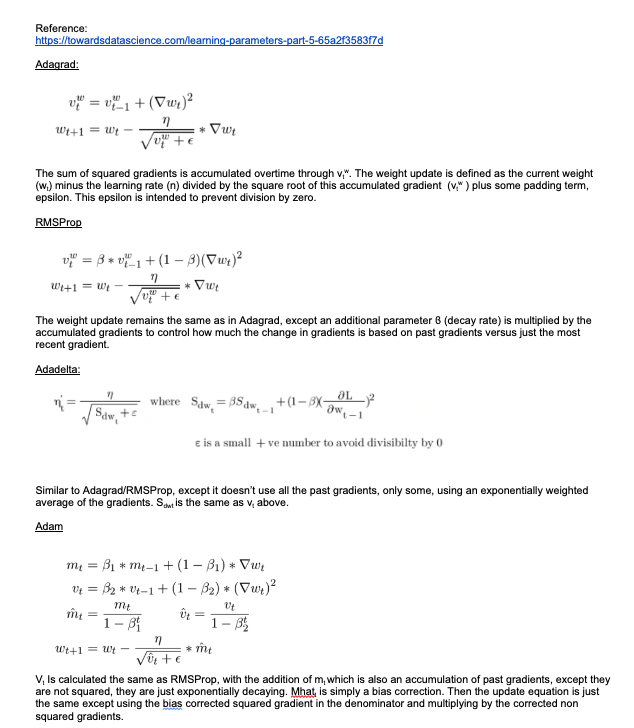

### 2. Train the neural network using all the five methods with L2-regularization for 200 epochs each and plot the training loss vs number of epochs. Which method performs best (lowest training loss) ? (10)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  = X_train/255.0
X_test = X_test/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
model = Sequential([
    Flatten(),
    Dense(1000,activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
    Dense(1000,activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
    Dense(10, activation='softmax')
      ])

In [ ]:
#time the training
from timeit import default_timer as timer
from tensorflow.keras.callbacks import Callback
class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
times=[]
accuracies=[]
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history_ada = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times=times+[sum(cb.logs)]
results=model.evaluate(X_test, y_test)
accuracies=accuracies+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 5s 4ms/step - loss: 41.0567 - accuracy: 0.2826 - val_loss: 39.9777 - val_accuracy: 0.3380
Epoch 2/200
391/391 [==============================] - 1s 3ms/step - loss: 39.0246 - accuracy: 0.3549 - val_loss: 38.0940 - val_accuracy: 0.3717
Epoch 3/200
391/391 [==============================] - 1s 3ms/step - loss: 37.2067 - accuracy: 0.3743 - val_loss: 36.3414 - val_accuracy: 0.3840
Epoch 4/200
391/391 [==============================] - 1s 3ms/step - loss: 35.5053 - accuracy: 0.3883 - val_loss: 34.6872 - val_accuracy: 0.3982
Epoch 5/200
391/391 [==============================] - 1s 3ms/step - loss: 33.9018 - accuracy: 0.3975 - val_loss: 33.1288 - val_accuracy: 0.4013
Epoch 6/200
391/391 [==============================] - 1s 3ms/step - loss: 32.3858 - accuracy: 0.4039 - val_loss: 31.6609 - val_accuracy: 0.4090
Epoch 7/200
391/391 [==============================] - 1s 3ms/step - loss: 30.9514 - accuracy: 0.4110 - val_loss: 30.2650 - val_ac

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history_rmsp = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times=times+[sum(cb.logs)]
results=model.evaluate(X_test, y_test)
accuracies=accuracies+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 2.5859 - accuracy: 0.2078 - val_loss: 2.0528 - val_accuracy: 0.3047
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1197 - accuracy: 0.2672 - val_loss: 2.0602 - val_accuracy: 0.2961
Epoch 3/200
391/391 [==============================] - 2s 4ms/step - loss: 2.0815 - accuracy: 0.2947 - val_loss: 2.1262 - val_accuracy: 0.2626
Epoch 4/200
391/391 [==============================] - 2s 4ms/step - loss: 2.0383 - accuracy: 0.3097 - val_loss: 2.1648 - val_accuracy: 0.2578
Epoch 5/200
391/391 [==============================] - 2s 4ms/step - loss: 2.0022 - accuracy: 0.3191 - val_loss: 2.0199 - val_accuracy: 0.3119
Epoch 6/200
391/391 [==============================] - 2s 4ms/step - loss: 1.9691 - accuracy: 0.3265 - val_loss: 2.0096 - val_accuracy: 0.3041
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 1.9455 - accuracy: 0.3332 - val_loss: 1.8844 - val_accuracy: 0.3521

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history_nadam = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times=times+[sum(cb.logs)]
results=model.evaluate(X_test, y_test)
accuracies=accuracies+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 1.8000 - accuracy: 0.3785 - val_loss: 1.8099 - val_accuracy: 0.3726
Epoch 2/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7897 - accuracy: 0.3793 - val_loss: 1.7805 - val_accuracy: 0.3830
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7859 - accuracy: 0.3810 - val_loss: 1.8139 - val_accuracy: 0.3664
Epoch 4/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7813 - accuracy: 0.3828 - val_loss: 1.8008 - val_accuracy: 0.3756
Epoch 5/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7760 - accuracy: 0.3828 - val_loss: 1.7865 - val_accuracy: 0.3801
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7717 - accuracy: 0.3868 - val_loss: 1.8290 - val_accuracy: 0.3623
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7693 - accuracy: 0.3871 - val_loss: 1.8799 - val_accuracy: 0.3422

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
history_addel = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times=times+[sum(cb.logs)]
results=model.evaluate(X_test, y_test)
accuracies=accuracies+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 2s 4ms/step - loss: 1.6316 - accuracy: 0.4338 - val_loss: 1.6539 - val_accuracy: 0.4272
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6258 - accuracy: 0.4378 - val_loss: 1.6525 - val_accuracy: 0.4275
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6243 - accuracy: 0.4386 - val_loss: 1.6513 - val_accuracy: 0.4281
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6231 - accuracy: 0.4389 - val_loss: 1.6502 - val_accuracy: 0.4279
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6220 - accuracy: 0.4390 - val_loss: 1.6493 - val_accuracy: 0.4276
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6210 - accuracy: 0.4395 - val_loss: 1.6486 - val_accuracy: 0.4276
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6203 - accuracy: 0.4398 - val_loss: 1.6481 - val_accuracy: 0.4285

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times=times+[sum(cb.logs)]
results=model.evaluate(X_test, y_test)
accuracies=accuracies+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7072 - accuracy: 0.4053 - val_loss: 1.7186 - val_accuracy: 0.4037
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6992 - accuracy: 0.4071 - val_loss: 1.7044 - val_accuracy: 0.4085
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6951 - accuracy: 0.4098 - val_loss: 1.6698 - val_accuracy: 0.4205
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 1.6956 - accuracy: 0.4112 - val_loss: 1.7033 - val_accuracy: 0.4083
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 1.7033 - accuracy: 0.4064 - val_loss: 1.7208 - val_accuracy: 0.4019
Epoch 6/200
391/391 [==============================] - 1s 3ms/step - loss: 1.7022 - accuracy: 0.4073 - val_loss: 1.7833 - val_accuracy: 0.3824
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 1.7087 - accuracy: 0.4080 - val_loss: 1.6809 - val_accuracy: 0.4140

In [ ]:
print(history_ada.history['loss'][-1])
print(history_rmsp.history['loss'][-1])
print(history_nadam.history['loss'][-1])
print(history_addel.history['loss'][-1])
print(history_adam.history['loss'][-1])

1.627648115158081
1.8677769899368286
1.6728028059005737
1.606222152709961
1.7062164545059204


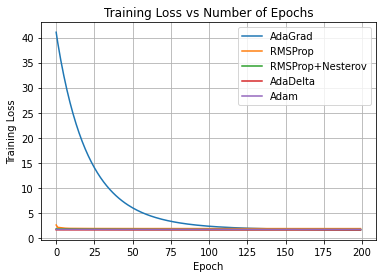

In [ ]:

fig = plt.figure()
plt.plot(history_ada.history['loss'],label='AdaGrad')
plt.plot(history_rmsp.history['loss'],label='RMSProp')
plt.plot(history_nadam.history['loss'],label='RMSProp+Nesterov')
plt.plot(history_addel.history['loss'],label='AdaDelta')
plt.plot(history_adam.history['loss'],label='Adam')
plt.title('Training Loss vs Number of Epochs')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

The lowest training loss is achieved through AdaDelta method. The loss is similarly low for all except AdaGrad, which takes about 100 epochs to achieve similar training loss.

### 3. Add dropout (probability 0.2 for input layer and 0.5 for hidden layers) and train the neural network again using all the five methods for 200 epochs. Compare the training loss with that in part 2. Which method performs the best ? For the five methods, compare their training time (to finish 200 epochs with dropout) to the training time in part 2 (to finish 200 epochs without dropout). (10)

In [ ]:
model2 = Sequential([
    Flatten(),
    Dropout(0.2),
    Dense(1000,activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1000,activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(10, activation='softmax')
      ])

In [ ]:
times_drop=[]
accuracies_drop=[]
model2.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
history_ada_drop = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times_drop=times_drop+[sum(cb.logs)]
results=model2.evaluate(X_test, y_test)
accuracies_drop=accuracies_drop+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 2s 4ms/step - loss: 41.4142 - accuracy: 0.1489 - val_loss: 40.1595 - val_accuracy: 0.2651
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 39.3329 - accuracy: 0.1932 - val_loss: 38.2912 - val_accuracy: 0.2934
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 37.5036 - accuracy: 0.2189 - val_loss: 36.5351 - val_accuracy: 0.3080
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 35.7992 - accuracy: 0.2335 - val_loss: 34.8847 - val_accuracy: 0.3068
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 34.1876 - accuracy: 0.2471 - val_loss: 33.3195 - val_accuracy: 0.3208
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 32.6667 - accuracy: 0.2561 - val_loss: 31.8407 - val_accuracy: 0.3277
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 31.2246 - accuracy: 0.2647 - val_loss: 30.4387 - val_ac

TypeError: ignored

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history_rmsp_drop = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times_drop=times_drop+[sum(cb.logs)]
results=model2.evaluate(X_test, y_test)
accuracies_drop=accuracies_drop+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 2.6690 - accuracy: 0.1779 - val_loss: 2.2614 - val_accuracy: 0.2239
Epoch 2/200
391/391 [==============================] - 2s 4ms/step - loss: 2.2874 - accuracy: 0.2114 - val_loss: 2.1980 - val_accuracy: 0.2637
Epoch 3/200
391/391 [==============================] - 2s 4ms/step - loss: 2.2568 - accuracy: 0.2267 - val_loss: 2.2645 - val_accuracy: 0.2111
Epoch 4/200
391/391 [==============================] - 2s 4ms/step - loss: 2.2321 - accuracy: 0.2331 - val_loss: 2.1564 - val_accuracy: 0.2465
Epoch 5/200
391/391 [==============================] - 2s 4ms/step - loss: 2.2047 - accuracy: 0.2362 - val_loss: 2.1640 - val_accuracy: 0.2690
Epoch 6/200
391/391 [==============================] - 2s 4ms/step - loss: 2.1856 - accuracy: 0.2375 - val_loss: 2.0913 - val_accuracy: 0.2779
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 2.1678 - accuracy: 0.2465 - val_loss: 2.0712 - val_accuracy: 0.3111

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
history_nadam_drop = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times_drop=times_drop+[sum(cb.logs)]
results=model2.evaluate(X_test, y_test)
accuracies_drop=accuracies_drop+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 3s 6ms/step - loss: 2.0792 - accuracy: 0.2546 - val_loss: 2.0081 - val_accuracy: 0.3078
Epoch 2/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0865 - accuracy: 0.2442 - val_loss: 2.0183 - val_accuracy: 0.2997
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0970 - accuracy: 0.2398 - val_loss: 2.0785 - val_accuracy: 0.2753
Epoch 4/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0863 - accuracy: 0.2427 - val_loss: 2.0557 - val_accuracy: 0.2778
Epoch 5/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0999 - accuracy: 0.2374 - val_loss: 2.0154 - val_accuracy: 0.2979
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0993 - accuracy: 0.2343 - val_loss: 2.0379 - val_accuracy: 0.2841
Epoch 7/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0820 - accuracy: 0.2425 - val_loss: 2.0316 - val_accuracy: 0.2791

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
history_addel_drop = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times_drop=times_drop+[sum(cb.logs)]
results=model2.evaluate(X_test, y_test)
accuracies_drop=accuracies_drop+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0652 - accuracy: 0.2288 - val_loss: 2.0606 - val_accuracy: 0.2634
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0578 - accuracy: 0.2325 - val_loss: 2.0574 - val_accuracy: 0.2629
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0589 - accuracy: 0.2321 - val_loss: 2.0562 - val_accuracy: 0.2638
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0582 - accuracy: 0.2333 - val_loss: 2.0562 - val_accuracy: 0.2642
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0585 - accuracy: 0.2334 - val_loss: 2.0554 - val_accuracy: 0.2645
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0579 - accuracy: 0.2336 - val_loss: 2.0556 - val_accuracy: 0.2647
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0543 - accuracy: 0.2334 - val_loss: 2.0544 - val_accuracy: 0.2650

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history_adam_drop = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,callbacks=[cb])
times_drop=times_drop+[sum(cb.logs)]
results=model2.evaluate(X_test, y_test)
accuracies_drop=accuracies_drop+[results[1] * 100]

Epoch 1/200
391/391 [==============================] - 2s 4ms/step - loss: 2.1092 - accuracy: 0.2105 - val_loss: 2.0764 - val_accuracy: 0.2329
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1305 - accuracy: 0.2002 - val_loss: 2.1059 - val_accuracy: 0.2287
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1316 - accuracy: 0.2026 - val_loss: 2.0746 - val_accuracy: 0.2070
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1249 - accuracy: 0.2008 - val_loss: 2.0906 - val_accuracy: 0.1956
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1280 - accuracy: 0.2012 - val_loss: 2.1130 - val_accuracy: 0.2082
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1483 - accuracy: 0.1887 - val_loss: 2.1425 - val_accuracy: 0.1753
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 2.1633 - accuracy: 0.1798 - val_loss: 2.1273 - val_accuracy: 0.2117

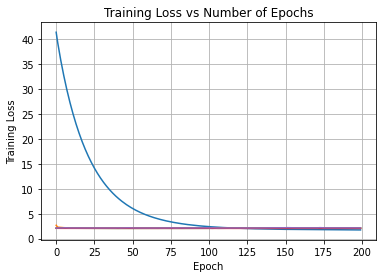

In [ ]:
fig = plt.figure()
plt.plot(history_ada_drop.history['loss'],label='AdaGrad')
plt.plot(history_rmsp_drop.history['loss'],label='RMSProp')
plt.plot(history_nadam_drop.history['loss'],label='RMSProp+Nesterov')
plt.plot(history_addel_drop.history['loss'],label='AdaDelta')
plt.plot(history_adam_drop.history['loss'],label='Adam')
plt.title('Training Loss vs Number of Epochs')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [ ]:
opts=["AdaGrad", "RMSProp", "RMSProp+Nesterov", "AdaDelta", "Adam"]
for x in range(len(opts)):
  print(opts[x],"- No Dropout:",times[x]," w/Drop_out:",times_drop[x])

AdaGrad - No Dropout: 275.10949947400104  w/Drop_out: 1784.1105092969976
RMSProp - No Dropout: 578.3249938620017  w/Drop_out: 2103.9947325669955
RMSProp+Nesterov - No Dropout: 934.6312363330032  w/Drop_out: 2483.1036776389974
AdaDelta - No Dropout: 1214.2742912630008  w/Drop_out: 2775.7134935009917
Adam - No Dropout: 1491.4652689519978  w/Drop_out: 3062.5501449449957


The training loss is roughly equivalent between the models using dropout and those whithout. The major difference is that training using dropout results in much longer training times at the cost of greater generalization ability.

### 4. Compare test accuracy of trained model for all the five methods from part 2 and part 3. Note that to calculate test accuracy of model trained using dropout you need to appropriately scale the weights (by the dropout probability). (4)

In [ ]:
opts=["AdaGrad", "RMSProp", "RMSProp+Nesterov", "AdaDelta", "Adam"]
for x in range(len(opts)):
  print(opts[x],"- No Dropout:",accuracies[x]," w/Drop_out:",accuracies_drop[x])

AdaGrad - No Dropout: 51.12000107765198  w/Drop_out: 47.90999889373779
RMSProp - No Dropout: 34.940001368522644  w/Drop_out: 30.140000581741333
RMSProp+Nesterov - No Dropout: 41.74000024795532  w/Drop_out: 26.890000700950623
AdaDelta - No Dropout: 43.27999949455261  w/Drop_out: 27.2599995136261
Adam - No Dropout: 39.86999988555908  w/Drop_out: 23.340000212192535


The test accuracy is better for those networks without dropout in this particular case. This could be because the network wasn't trained for long enough that dropout actually improves generalization. 

### Problem 2 - Learning Rate, Batch Size, FashionMNIST 25 points
Recall cyclical learning rate policy discussed in Lecture 4. The learning rate changes in cyclical manner
between lrmin and lrmax, which are hyperparameters that need to be specified. For this problem you first
need to read carefully the article referenced below as you will be making use of the code there (in Keras)
and modifying it as needed. For those who want to work in Pytorch there are open source implementations
of this policy available which you can easily search for and build over them. You will work with FashionM-
NIST dataset and MiniGoogLeNet (described in reference). If you cannot get MiniGoogleNet code from the
reference you can do this question using LeNet.

##### Setup/loading required functions:

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

label_bin = LabelBinarizer()
y_train = label_bin.fit_transform(y_train)
y_test = label_bin.transform(y_test)


X_train = X_train.astype("float")
X_test = X_test.astype("float")
X_train = X_train - np.mean(X_train, axis=0)
X_test = X_test - np.mean(X_train, axis=0)

X_train = np.array(list(map(lambda x: cv2.resize(x, (32,32)),X_train)))
X_test = np.array(list(map(lambda x: cv2.resize(x, (32,32)),X_test)))

X_train = X_train.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

X_train = X_train.reshape((X_train.shape[0], 32,32, 1))
X_test = X_test.reshape((X_test.shape[0], 32,32, 1))

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras import backend as K


class MiniGoogLeNet:
    @staticmethod
    def conv_module(x, K, kX, kY, stride, chanDim, padding="same"):
        # define a CONV => BN => RELU pattern
        x = Conv2D(K, (kX, kY), strides=stride, padding=padding)(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Activation("relu")(x)

        # return the block
        return x

    @staticmethod
    def inception_module(x, numK1x1, numK3x3, chanDim):
        # define two CONV modules, then concatenate across the
        # channel dimension
        conv_1x1 = MiniGoogLeNet.conv_module(x, numK1x1, 1, 1, (1, 1), chanDim)
        conv_3x3 = MiniGoogLeNet.conv_module(x, numK3x3, 3, 3, (1, 1), chanDim)
        x = concatenate([conv_1x1, conv_3x3], axis=chanDim)

        # return the block
        return x

    @staticmethod
    def downsample_module(x, K, chanDim):
        # define the CONV module and POOL, then concatenate
        # across the channel dimensions
        conv_3x3 = MiniGoogLeNet.conv_module(
            x, K, 3, 3, (2, 2), chanDim, padding="valid"
        )
        pool = MaxPooling2D((3, 3), strides=(2, 2))(x)
        x = concatenate([conv_3x3, pool], axis=chanDim)

        # return the block
        return x

    @staticmethod
    def build(width, height, depth, classes):
        # initialize the input shape to be "channels last" and the
        # channels dimension itself
        inputShape = (height, width, depth)
        chanDim = -1

        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # define the model input and first CONV module
        inputs = Input(shape=inputShape)
        x = MiniGoogLeNet.conv_module(inputs, 96, 3, 3, (1, 1), chanDim)

        # two Inception modules followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 32, 32, chanDim)
        x = MiniGoogLeNet.inception_module(x, 32, 48, chanDim)
        x = MiniGoogLeNet.downsample_module(x, 80, chanDim)

        # four Inception modules followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 112, 48, chanDim)
        x = MiniGoogLeNet.inception_module(x, 96, 64, chanDim)
        x = MiniGoogLeNet.inception_module(x, 80, 80, chanDim)
        x = MiniGoogLeNet.inception_module(x, 48, 96, chanDim)
        x = MiniGoogLeNet.downsample_module(x, 96, chanDim)

        # two Inception modules followed by global POOL and dropout
        x = MiniGoogLeNet.inception_module(x, 176, 160, chanDim)
        x = MiniGoogLeNet.inception_module(x, 176, 160, chanDim)
        x = AveragePooling2D((7, 7))(x)
        x = Dropout(0.5)(x)

        # softmax classifier
        x = Flatten()(x)
        x = Dense(classes)(x)
        x = Activation("softmax")(x)

        # create the model
        model = Model(inputs, x, name="googlenet")

        # return the constructed network architecture
        return model

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import *
import numpy as np


class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each
        cycle iteration.
    For more detail, please see paper.

    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```

    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(
        self,
        base_lr=0.001,
        max_lr=0.006,
        step_size=2000.0,
        mode="triangular",
        gamma=1.0,
        scale_fn=None,
        scale_mode="cycle",
    ):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == "triangular":
                self.scale_fn = lambda x: 1.0
                self.scale_mode = "cycle"
            elif self.mode == "triangular2":
                self.scale_fn = lambda x: 1 / (2.0 ** (x - 1))
                self.scale_mode = "cycle"
            elif self.mode == "exp_range":
                self.scale_fn = lambda x: gamma ** (x)
                self.scale_mode = "iterations"
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.0
        self.trn_iterations = 0.0
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None, new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.0

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.scale_mode == "cycle":
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(
                0, (1 - x)
            ) * self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(
                0, (1 - x)
            ) * self.scale_fn(self.clr_iterations)

    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())

    def on_batch_end(self, epoch, logs=None):

        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault("lr", []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault("iterations", []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        K.set_value(self.model.optimizer.lr, self.clr())


In [ ]:
# import the necessary packages
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import tempfile


class LearningRateFinder:
    def __init__(self, model, stopFactor=4, beta=0.98):
        # store the model, stop factor, and beta value (for computing
        # a smoothed, average loss)
        self.model = model
        self.stopFactor = stopFactor
        self.beta = beta
        # initialize our list of learning rates and losses,
        # respectively
        self.lrs = []
        self.losses = []
        # initialize our learning rate multiplier, average loss, best
        # loss found thus far, current batch number, and weights file
        self.lrMult = 1
        self.avgLoss = 0
        self.bestLoss = 1e9
        self.batchNum = 0
        self.weightsFile = None

    def reset(self):
        # re-initialize all variables from our constructor
        self.lrs = []
        self.losses = []
        self.lrMult = 1
        self.avgLoss = 0
        self.bestLoss = 1e9
        self.batchNum = 0
        self.weightsFile = None

    def is_data_iter(self, data):
        # define the set of class types we will check for
        iterClasses = [
            "NumpyArrayIterator",
            "DirectoryIterator",
            "DataFrameIterator",
            "Iterator",
            "Sequence",
        ]
        # return whether our data is an iterator
        return data.__class__.__name__ in iterClasses

    def on_batch_end(self, batch, logs):
        # grab the current learning rate and add log it to the list of
        # learning rates that we've tried
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)
        # grab the loss at the end of this batch, increment the total
        # number of batches processed, compute the average average
        # loss, smooth it, and update the losses list with the
        # smoothed value
        l = logs["loss"]
        self.batchNum += 1
        self.avgLoss = (self.beta * self.avgLoss) + ((1 - self.beta) * l)
        smooth = self.avgLoss / (1 - (self.beta ** self.batchNum))
        self.losses.append(smooth)
        # compute the maximum loss stopping factor value
        stopLoss = self.stopFactor * self.bestLoss
        # check to see whether the loss has grown too large
        if self.batchNum > 1 and smooth > stopLoss:
            # stop returning and return from the method
            self.model.stop_training = True
            return
        # check to see if the best loss should be updated
        if self.batchNum == 1 or smooth < self.bestLoss:
            self.bestLoss = smooth
        # increase the learning rate
        lr *= self.lrMult
        K.set_value(self.model.optimizer.lr, lr)

    def find(
        self,
        trainData,
        startLR,
        endLR,
        epochs=None,
        stepsPerEpoch=None,
        batchSize=32,
        sampleSize=2048,
        verbose=1,
    ):
        # reset our class-specific variables
        self.reset()
        # determine if we are using a data generator or not
        useGen = self.is_data_iter(trainData)
        # if we're using a generator and the steps per epoch is not
        # supplied, raise an error
        if useGen and stepsPerEpoch is None:
            msg = "Using generator without supplying stepsPerEpoch"
            raise Exception(msg)
        # if we're not using a generator then our entire dataset must
        # already be in memory
        elif not useGen:
            # grab the number of samples in the training data and
            # then derive the number of steps per epoch
            numSamples = len(trainData[0])
            stepsPerEpoch = np.ceil(numSamples / float(batchSize))
        # if no number of training epochs are supplied, compute the
        # training epochs based on a default sample size
        if epochs is None:
            epochs = int(np.ceil(sampleSize / float(stepsPerEpoch)))

        # =============
        # compute the total number of batch updates that will take
        # place while we are attempting to find a good starting
        # learning rate
        numBatchUpdates = epochs * stepsPerEpoch
        # derive the learning rate multiplier based on the ending
        # learning rate, starting learning rate, and total number of
        # batch updates
        self.lrMult = (endLR / startLR) ** (1.0 / numBatchUpdates)
        # create a temporary file path for the model weights and
        # then save the weights (so we can reset the weights when we
        # are done)
        self.weightsFile = tempfile.mkstemp()[1]
        self.model.save_weights(self.weightsFile)
        # grab the *original* learning rate (so we can reset it
        # later), and then set the *starting* learning rate
        origLR = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, startLR)

        # construct a callback that will be called at the end of each
        # batch, enabling us to increase our learning rate as training
        # progresses
        callback = LambdaCallback(
            on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs)
        )
        # check to see if we are using a data iterator
        if useGen:
            self.model.fit(
                x=trainData,
                steps_per_epoch=stepsPerEpoch,
                epochs=epochs,
                verbose=verbose,
                callbacks=[callback],
            )
        # otherwise, our entire training data is already in memory
        else:
            # train our model using Keras' fit method
            self.model.fit(
                x=trainData[0],
                y=trainData[1],
                batch_size=batchSize,
                epochs=epochs,
                callbacks=[callback],
                verbose=verbose,
            )
        # restore the original model weights and learning rate
        self.model.load_weights(self.weightsFile)
        K.set_value(self.model.optimizer.lr, origLR)

    def plot_loss(self, skipBegin=10, skipEnd=1, title=""):
        # grab the learning rate and losses values to plot
        lrs = self.lrs[skipBegin:-skipEnd]
        losses = self.losses[skipBegin:-skipEnd]
        # plot the learning rate vs. loss
        plt.plot(lrs, losses)
        plt.xscale("log")
        plt.xlabel("Learning Rate (Log Scale)")
        plt.ylabel("Loss")
        # if the title is not empty, add it to the plot
        if title != "":
            plt.title(title)

#### 1. Fix batch size to 64 and start with 10 candidate learning rates between 10−9 and 101 and train your model for 5 epochs. Plot the training loss as a function of learning rate. You should see a curve like Figure 3 in reference below. From that figure identify the values of lrmin and lrmax. (5)

In [ ]:
from keras.optimizers import SGD

model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
lrs=np.logspace(-9,1,11)
losses_lrs=[]
for x in lrs:
  print(x)
  model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=x, momentum=0.9), metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test),shuffle=True,epochs=5,callbacks=[cb])
  print(history.history['loss'][-1])
  losses_lrs=losses_lrs+[history.history['loss'][-1]]

1e-09
Epoch 1/5
938/938 [==============================] - 15s 14ms/step - loss: 2.6463 - accuracy: 0.1051 - val_loss: 2.8832 - val_accuracy: 0.1105
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 2.6495 - accuracy: 0.1049 - val_loss: 2.9003 - val_accuracy: 0.1111
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 2.6461 - accuracy: 0.1057 - val_loss: 2.9023 - val_accuracy: 0.1110
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 2.6468 - accuracy: 0.1055 - val_loss: 2.8995 - val_accuracy: 0.1108
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 2.6486 - accuracy: 0.1045 - val_loss: 2.9036 - val_accuracy: 0.1115
2.648602247238159
1e-08
Epoch 1/5
938/938 [==============================] - 15s 14ms/step - loss: 2.6465 - accuracy: 0.1059 - val_loss: 2.8995 - val_accuracy: 0.1109
Epoch 2/5
938/938 [==============================] - 13s 13ms/step - loss: 2.6465 - accuracy: 0.1061 - val_loss:

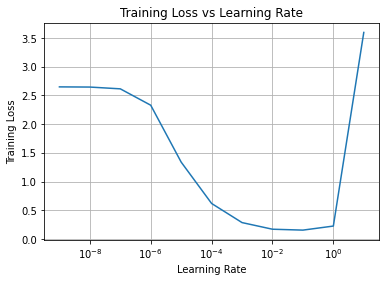

In [ ]:
fig = plt.figure()
plt.plot(np.logspace(-9,1,11),losses_lrs,label='Training Loss')
plt.title('Training Loss vs Learning Rate')
plt.ylabel('Training Loss')
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.grid()

In [ ]:
min_lr_found=np.logspace(-9,1,11)[5]
max_lr_found=np.logspace(-9,1,11)[8]
print(min_lr_found,max_lr_found)

0.0001 0.1


#### 2. Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and lrmin and lrmax values obtained in part 1. Here you will train till convergence and not just 5 epochs as in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference). (10)

In [ ]:
clr = CyclicLR(
    mode="triangular",
    base_lr=min_lr_found,
    max_lr=max_lr_found,
    step_size= 10 * (X_train.shape[0] // 64),
)

[INFO] using 'triangular' method


In [ ]:
aug = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=min_lr_found, momentum=0.9), metrics=["accuracy"])
history_cyc = model.fit(
    x=aug.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // 64,
    epochs=100,
    callbacks=[clr],
    verbose=1
)

[INFO] training network...
Epoch 1/100
937/937 [==============================] - 22s 21ms/step - loss: 2.2545 - accuracy: 0.1299 - val_loss: 54.6275 - val_accuracy: 0.1072
Epoch 2/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2539 - accuracy: 0.1315 - val_loss: 50.2486 - val_accuracy: 0.0889
Epoch 3/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2496 - accuracy: 0.1315 - val_loss: 49.0491 - val_accuracy: 0.1223
Epoch 4/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2497 - accuracy: 0.1333 - val_loss: 52.2130 - val_accuracy: 0.0958
Epoch 5/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2474 - accuracy: 0.1350 - val_loss: 54.1129 - val_accuracy: 0.1121
Epoch 6/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2450 - accuracy: 0.1344 - val_loss: 52.3431 - val_accuracy: 0.0941
Epoch 7/100
937/937 [==============================] - 19s 20ms/step - loss: 2.2460 - accuracy: 0

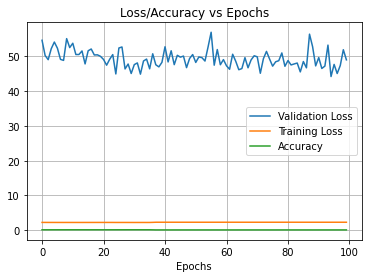

In [ ]:
fig = plt.figure()
plt.plot(history_cyc.history['val_loss'],label='Validation Loss')
plt.plot(history_cyc.history['loss'],label='Training Loss')
plt.plot(history_cyc.history['accuracy'],label='Accuracy')
plt.title('Loss/Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

#### 3. We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing learning rate for a fixed batch size. Fix learning rate to lrmax and train your network starting with batch size 32 and incrementally going upto 16384 (in increments of a factor of 2; like 32, 64...). You can choose a step size (in terms of number of iterations) to increment the batch size. If your GPU cannot handle large batch sizes, you need to employ effective batch size approach as discussed in Lecture 3 to simulate large batches. Plot the training loss as a function of batch size. Is the generalization of your final model similar or different than cyclical learning rate policy? (10)

In [ ]:
batch_sizes=[]
epoch_sizes=[]
i=32
e=5
while i <= 16384:
  batch_sizes=batch_sizes+[i]
  epoch_sizes=epoch_sizes+[e]
  i=i*2
  e=e*2

In [ ]:
for x in range(8):
  print("Batch size:",batch_sizes[x]," & Epoch size:",epoch_sizes[x])

Batch size: 32  & Epoch size: 5
Batch size: 64  & Epoch size: 10
Batch size: 128  & Epoch size: 20
Batch size: 256  & Epoch size: 40
Batch size: 512  & Epoch size: 80
Batch size: 1024  & Epoch size: 160
Batch size: 2048  & Epoch size: 320
Batch size: 4096  & Epoch size: 640


In [ ]:
aug = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=max_lr_found, momentum=0.9), metrics=["accuracy"])
losses_batch=[]
for x in range(8):
  print("Batch size:",batch_sizes[x])
  history_batch = model.fit(
      x=aug.flow(X_train, y_train, batch_size=batch_sizes[x]),
      validation_data=(X_test, y_test),
      steps_per_epoch=X_train.shape[0] // batch_sizes[x],
      epochs=epoch_sizes[x],
      verbose=1
  )
  losses_batch=losses_batch+[[history_batch.history['loss']]]
  pd.DataFrame(losses_batch).to_csv(f'/content/gdrive/My Drive/losses_batch.csv', index=False)

Batch size: 32
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 26s 13ms/step - loss: 2.3097 - accuracy: 0.0998 - val_loss: 55.0631 - val_accuracy: 0.1054
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2.3093 - accuracy: 0.1023 - val_loss: 53.0715 - val_accuracy: 0.0939
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 2.3101 - accuracy: 0.0993 - val_loss: 50.0144 - val_accuracy: 0.1536
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2.3359 - accuracy: 0.1002 - val_loss: 48.0054 - val_accuracy: 0.0801
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 2.3090 - accuracy: 0.1019 - val_loss: 57.6576 - val_accuracy: 0.1542
Batch size: 64
Epoch 1/10
937/937 [==============================] - 19s 20ms/step - loss: 2.3062 - accuracy: 0.1004 - val_loss: 45.9180 - val_accuracy: 0.0922
Epoch 2/10
937/937 [==============================] - 19s 20ms/step - loss: 2.3062 - accuracy: 0.0975 - val_loss: 51.179

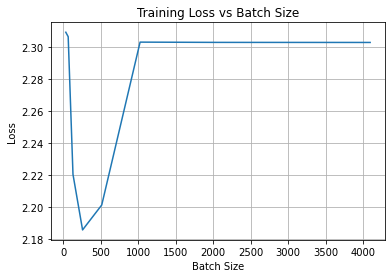

In [ ]:
final_losses=[]
for x in losses_batch:
  final_losses=final_losses+[x[0][-1]]
fig = plt.figure()
plt.plot(batch_sizes[:8],final_losses)
plt.title('Training Loss vs Batch Size')
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.grid()
plt.show()

The training loss decreased sharply as batch size inreases, but after a certain point around 250 the loss increases until it hits a plateau around 1000. The cyclical learning rate policy achieved higher validation accuracy/generalization than the fixed learning rate with varying batch size, and took much less time to run.

### Problem 3 - Convolutional Neural Networks Architectures 25 points In this problem we will study and compare different convolutional neural network architectures. We will calculate number of parameters (weights, to be learned) and memory requirement of each network. We will also analyze inception modules and understand their design.

##### 2. VGG (Simonyan et al.) has an extremely homogeneous architecture that only performs 3x3 convolutions with stride 1 and pad 1 and 2x2 max pooling with stride 2 (and no padding) from the beginning to the end. However VGGNet is very expensive to evaluate and uses a lot more memory and parameters. Refer to VGG19 architecture on page 3 in Table 1 of the paper by Simonyan et al. You need to complete Table 1 below for calculating activation units and parameters at each layer in VGG19 (without counting biases). Its been partially filled for you. (6)


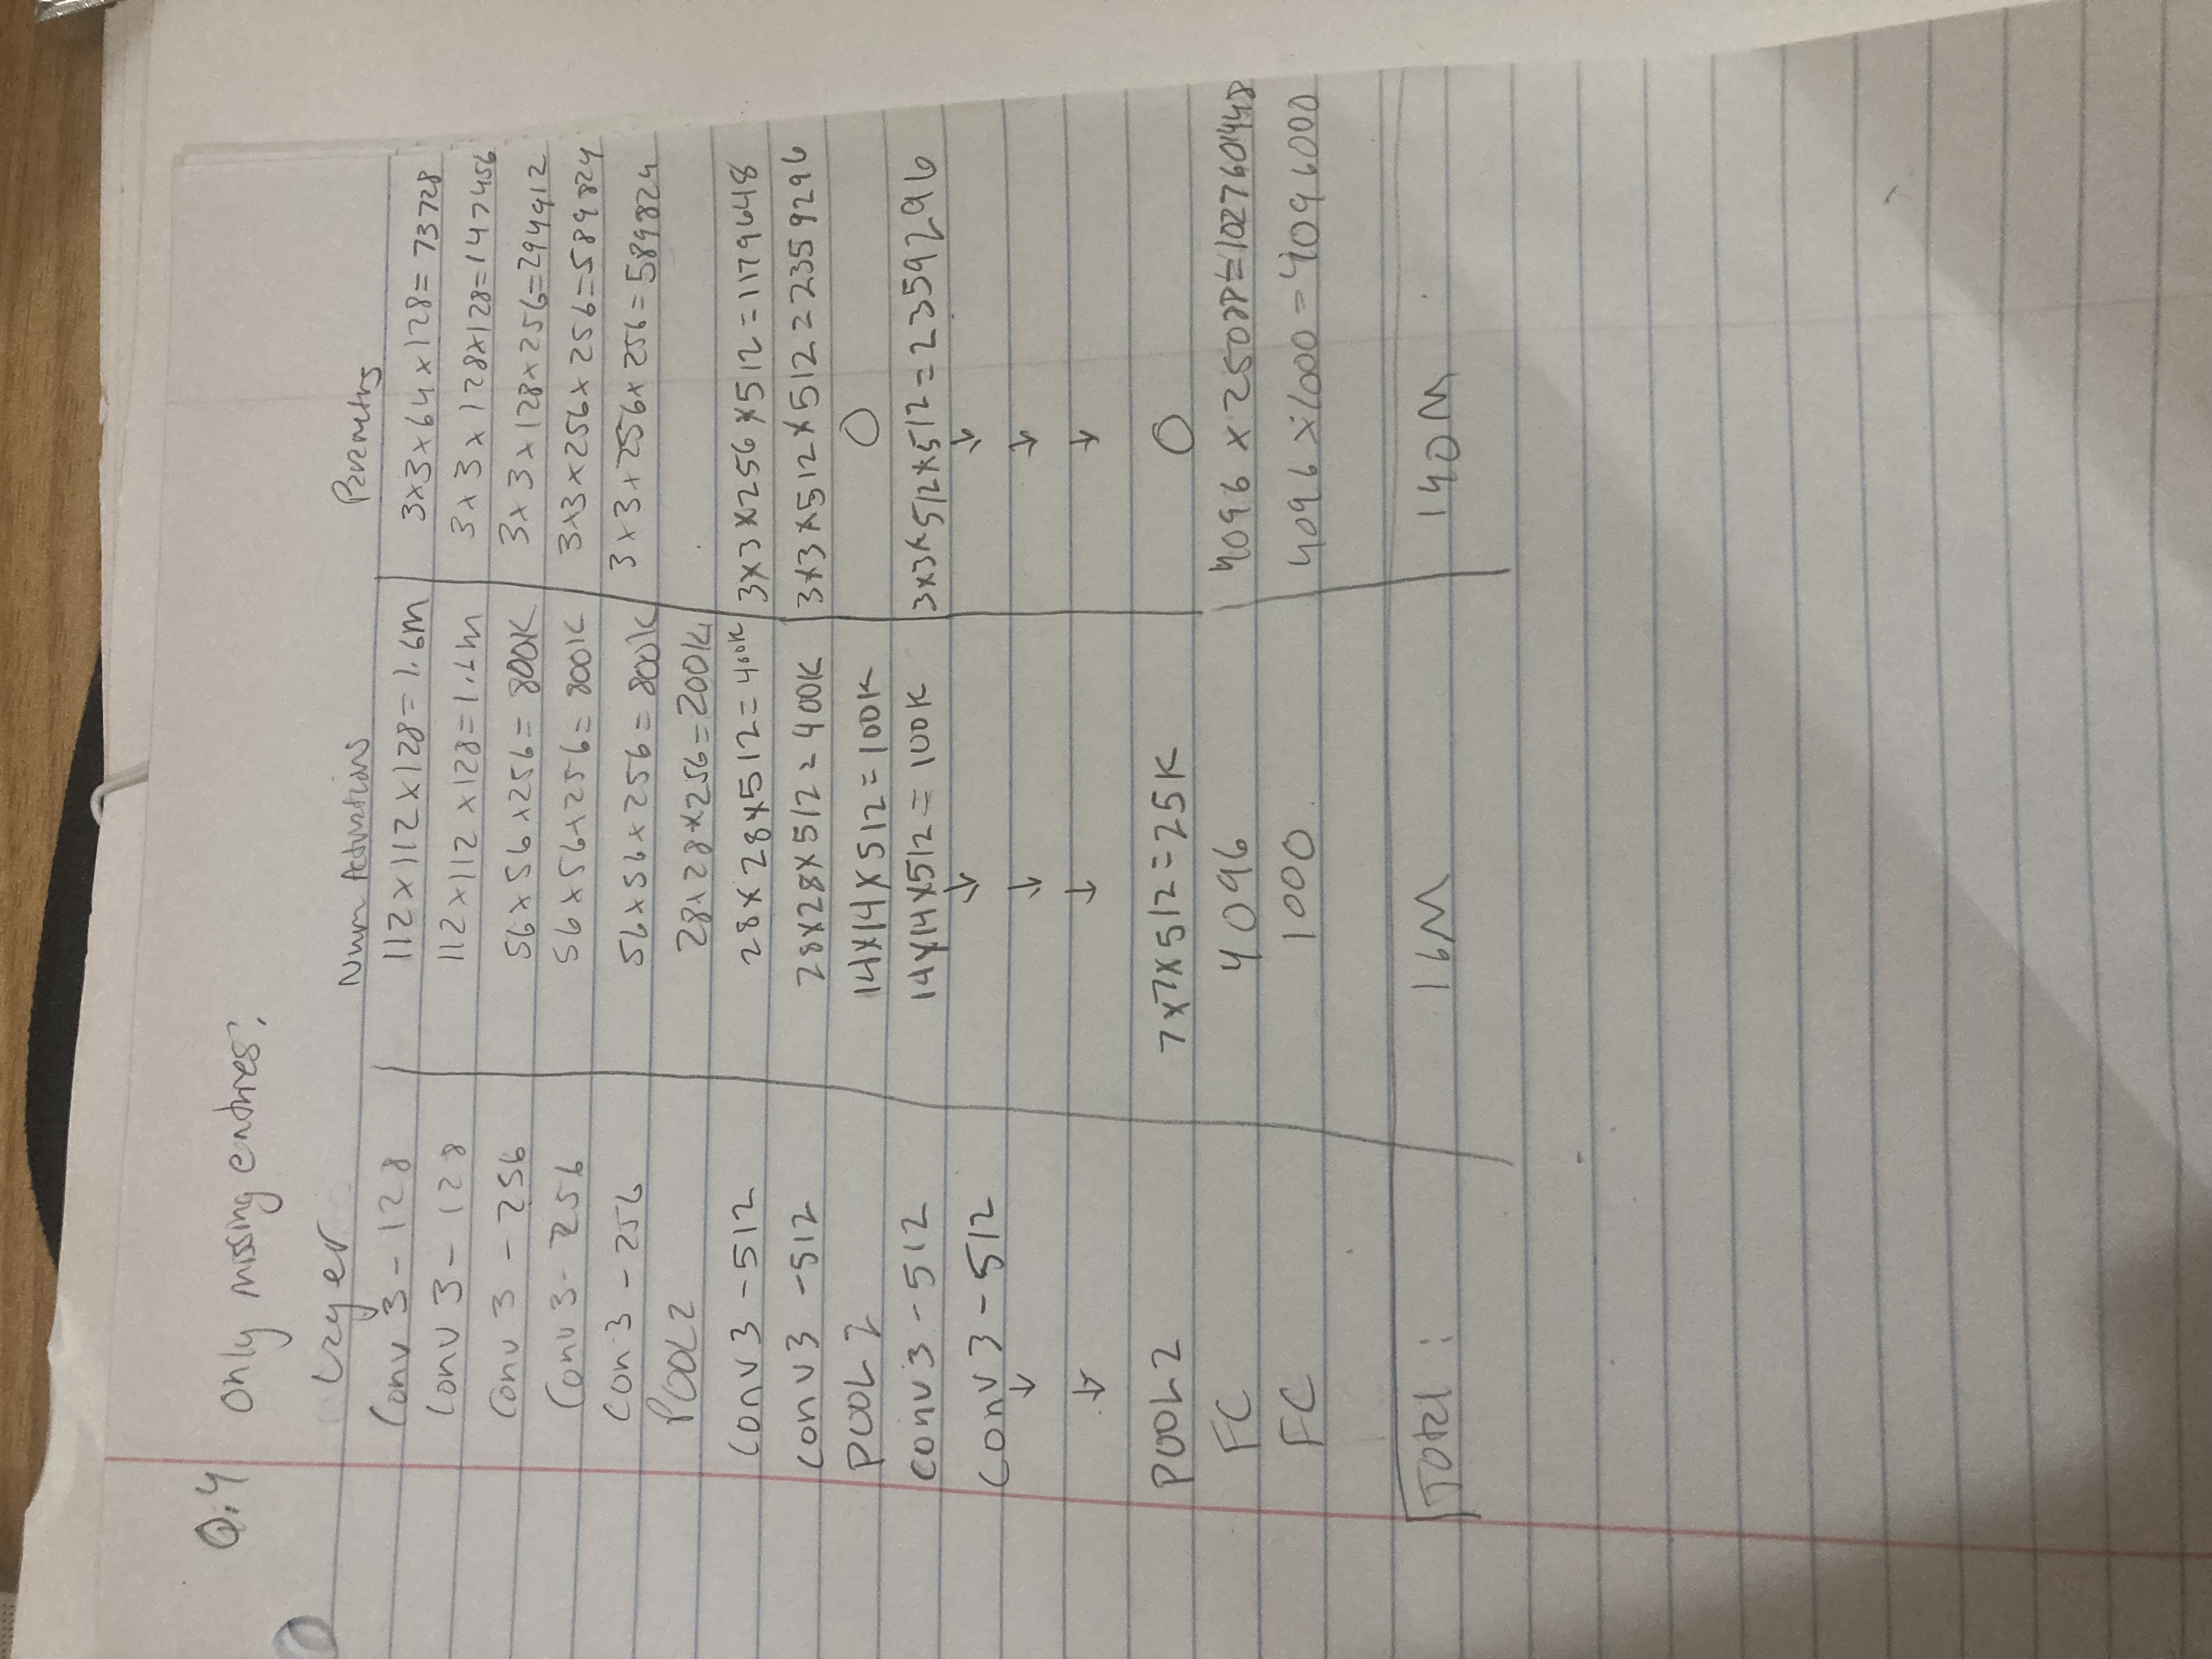

#### 3. VGG architectures have smaller filters but deeper networks compared to Alexnet (3x3 compared to 11x11 or 5x5). Show that a stack of N convolution layers each of filter size F ×F has the same receptive field as one convolution layer with filter of size (N F −N + 1) ×(N F −N + 1). Use this to calculate the receptive field of 3 filters of size 5x5. (3)


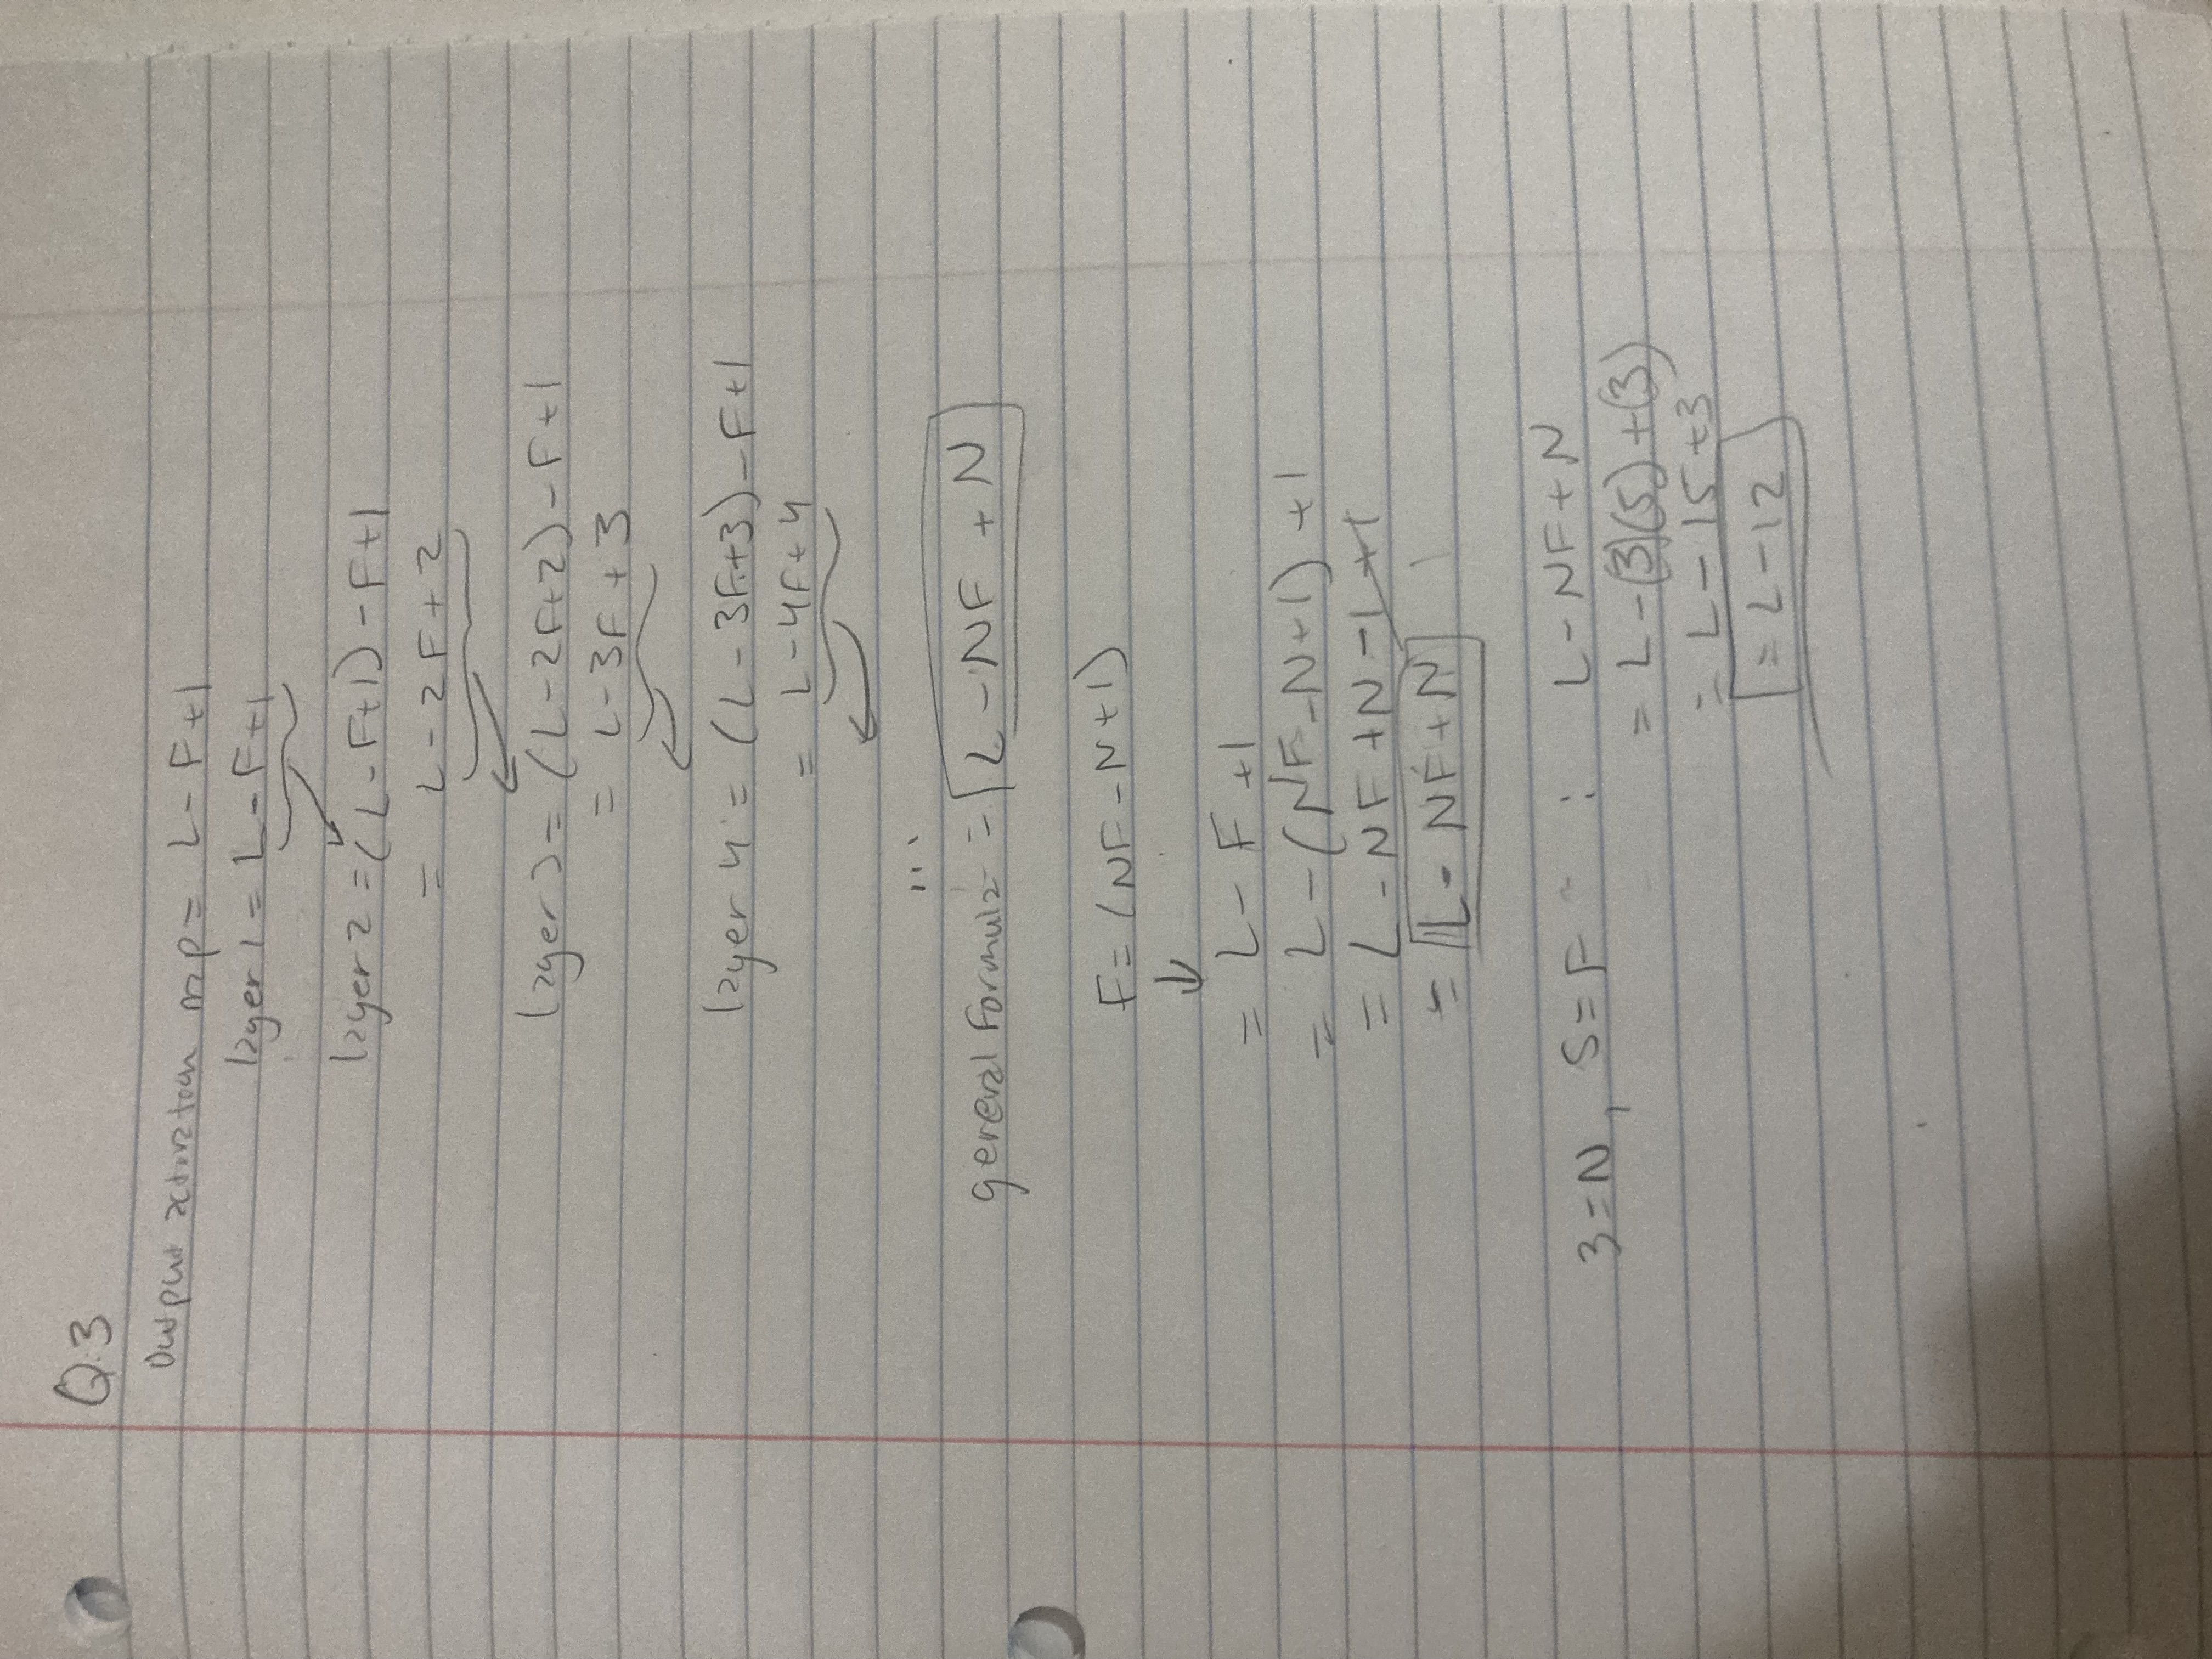

#### 4. The original Googlenet paper (Szegedy et al.) proposes two architectures for Inception module, shown in Figure 2 on page 5 of the paper, referred to as naive and dimensionality reduction respectively.
(a) What is the general idea behind designing an inception module (parallel convolutional filters of
different sizes with a pooling followed by concatenation) in a convolutional neural network ? (2) <br>
The general idea is optimizing the computing resources needed for deep/wide networks.1x1 convolutions act as dimensionality reduction modules and help overcome the bottleneck to computation, the size, allowing wider and deeper networks. To combat size problems, using sparsely connected layers would help, and the goal here is to approximate the best sparse architecture based on the given dense components. 


(b) Assuming the input to inception module (referred to as ”previous layer” in Figure 2 of the pa-
per) has size 32x32x256, calculate the output size after filter concatenation for the naive and
dimensionality reduction inception architectures with number of filters given in Figure 1. (3)


Naive: <br>
Conv1-32x32x128<br>
Conv2-32x32x192<br>
Conv3-32x32x96<br>
Pool-32x32x256<br>
=(32x32)x(128+192+96+256)<br>
=(32x32)x(672)<br>
=32x32x672<br>
<br>
Dim Reduction:<br>
Conv1-32x32x128<br>
Conv2-32x32x192<br>
Conv3-32x32x96<br>
Pool-32x32x64<br>
=(32x32)x(128+192+96+64)<br>
=(32x32)x(480)<br>
=32x32x480

(d) Based on the calculations in part (c) explain the problem with naive architecture and how dimensionality reduction architecture helps (Hint: compare computational complexity). How much is the computational saving ? (2+2)<br>
The computational complexity of the dimensionality reduced inception over the naïve implementation is less because there are smaller outputs from the layers and thus less computations to perform.

## Problem 4 - Batch Augmentation, Cutout Regularization 20 points. 
In this problem we will be achieving large-batch SGD using batch augmentation techniques. In batch aug-
mentation instances of samples within the same batch are generated with different data augmentations. Batch
augmentation acts as a regularizer and an accelerator, increasing both generalization and performance scal-
ing. One such augmentation scheme is using Cutout regularization, where additional samples are generated
by occluding random portions of an image.

#### 1. Explain cutout regularization and its advantages compared to simple dropout (as argued in the paper by DeVries et al) in your own words. Select any 2 images from CIFAR10 and show how does these images look after applying cutout. Use a square-shaped fixed size zero-mask to a random location of each image and generate its cutout version. Refer to the paper by DeVries et al (Section 3) and associated github repository. (2+4)

Cutout regularization is a regularization method where certain square portions of the image are chosen at random to be removed while the model is training. This boosts the generalization ability of the network and is more straightforward to understand and execute than some other regularization methods. In cutout regularization, certain regions are dropped from the the input layer, whereas in dropout they can also be dropped from the following hidden layers. Dropout performs worse in convolutional layers than fully connected layers. With cutout regularization, images appearing in cutout regions are completely erased from the feature maps, and the model must use the context of the image to attempt to fill in the blanks. Likewise, it is better than dropout in the context of image data because even though pixels are randomly dropped when dropout is applied, neighboring pixels often contain identical information about the image, so not much is lost when a single one is removed. Dropout in convolutional layers does allow it to handle more noisy data, but it doesn't give the desired averageing affect. Cutout is more similar to data augementation by creating "new" inputs where entire areas are removed, instead of just adding noise.

References: https://github.com/uoguelph-mlrg/Cutout


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
def cutout(img,blocks=1,length=12):
        h,w,c = img.shape
        mod = np.ones([h, w])
        for i in range(blocks):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - length // 2, 0, h)
            y2 = np.clip(y + length // 2, 0, h)
            x1 = np.clip(x - length // 2, 0, w)
            x2 = np.clip(x + length // 2, 0, w)

            mod[y1: y2, x1: x2] = 0
        mod = np.expand_dims(mod, axis=2)
        return img * mod.reshape(32,32,-1)

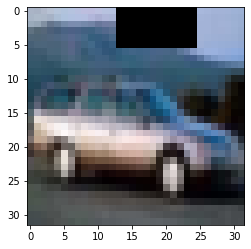

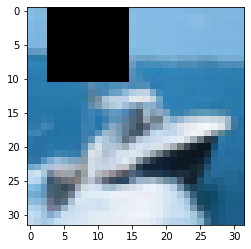

In [ ]:
fig, ax = plt.subplots()
plt.imshow(cutout(x_train[np.random.randint(10)]))
fig, ax = plt.subplots()
plt.imshow(cutout(x_train[np.random.randint(10)]))

### 2. Using CIFAR10 datasest and Resnet-44 we will first apply simple data augmentation as in He et al.(look at Section 4.2 of He et al.) and train the model with batch size 64. Note that testing is always done with original images. Plot validation error vs number of training epochs. (4)
References: https://keras.io/zh/examples/cifar10_resnet/

In [ ]:
x_train_mean = np.mean(x_train, axis=0)
x_train = x_train - x_train_mean
x_test = x_test-x_train_mean

In [ ]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
  
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))
    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet(input_shape, depth, num_classes=10):
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)
    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  
                    strides = 2    
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180  : lr *= 0.5e-3
    elif epoch > 160: lr *= 1e-3
    elif epoch > 120: lr *= 1e-2
    elif epoch > 80 : lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [ ]:
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]

In [ ]:
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

datagen.fit(x_train)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=30)

In [ ]:
model = resnet(input_shape=x_train.shape[1:], depth= 65)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                        validation_data=(x_test, y_test),
                        epochs=150, verbose=1,
                        callbacks=[callbacks,es])

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Learning rate:  0.001
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_268 (Conv2D)            (None, 32, 32, 16)   448         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_256 (Batch  (None, 32, 32, 16)  64          ['conv2d_268[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_256 (Activation)    (None, 32, 32, 16)   0           ['bat

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 add_88 (Add)                   (None, 32, 32, 64)   0           ['add_87[0][0]',                 
                                                                  'conv2d_284[0][0]']             
                                                                                                  
 batch_normalization_271 (Batch  (None, 32, 32, 64)  256         ['add_88[0][0]']                 
 Normalization)                                                                                   
                                                                                                  
 activation_271 (Activation)    (None, 32, 32, 64)   0           ['batch_normalization_271[0][0]']
                                                                                                  
 conv2d_285 (Conv2D)            (None, 32, 32, 16)   1040        ['activation_271[0][0]']         
                                                                                                  
 batch_nor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


781/782 [============================>.] - ETA: 0s - loss: 2.2849 - accuracy: 0.4853

782/782 [==============================] - 44s 46ms/step - loss: 2.2842 - accuracy: 0.4853 - val_loss: 3.3867 - val_accuracy: 0.3673 - lr: 0.0010
Learning rate:  0.001
Epoch 2/150
782/782 [==============================] - ETA: 0s - loss: 1.5641 - accuracy: 0.6288

782/782 [==============================] - 35s 45ms/step - loss: 1.5641 - accuracy: 0.6288 - val_loss: 2.2300 - val_accuracy: 0.4920 - lr: 0.0010
Learning rate:  0.001
Epoch 3/150
781/782 [============================>.] - ETA: 0s - loss: 1.3053 - accuracy: 0.6912

782/782 [==============================] - 34s 43ms/step - loss: 1.3053 - accuracy: 0.6911 - val_loss: 1.9270 - val_accuracy: 0.5552 - lr: 0.0010
Learning rate:  0.001
Epoch 4/150
781/782 [============================>.] - ETA: 0s - loss: 1.1563 - accuracy: 0.7303

782/782 [==============================] - 35s 45ms/step - loss: 1.1563 - accuracy: 0.7302 - val_loss: 1.2659 - val_accuracy: 0.7023 - lr: 0.0010
Learning rate:  0.001
Epoch 5/150
782/782 [==============================] - ETA: 0s - loss: 1.0551 - accuracy: 0.7565

782/782 [==============================] - 35s 44ms/step - loss: 1.0551 - accuracy: 0.7565 - val_loss: 1.2644 - val_accuracy: 0.6944 - lr: 0.0010
Learning rate:  0.001
Epoch 6/150
782/782 [==============================] - ETA: 0s - loss: 0.9766 - accuracy: 0.7810

782/782 [==============================] - 33s 42ms/step - loss: 0.9766 - accuracy: 0.7810 - val_loss: 1.3207 - val_accuracy: 0.6706 - lr: 0.0010
Learning rate:  0.001
Epoch 7/150
782/782 [==============================] - ETA: 0s - loss: 0.9263 - accuracy: 0.7912

782/782 [==============================] - 33s 42ms/step - loss: 0.9263 - accuracy: 0.7912 - val_loss: 1.1533 - val_accuracy: 0.7213 - lr: 0.0010
Learning rate:  0.001
Epoch 8/150
782/782 [==============================] - ETA: 0s - loss: 0.8838 - accuracy: 0.8015

782/782 [==============================] - 34s 43ms/step - loss: 0.8838 - accuracy: 0.8015 - val_loss: 1.1614 - val_accuracy: 0.7169 - lr: 0.0010
Learning rate:  0.001
Epoch 9/150
782/782 [==============================] - ETA: 0s - loss: 0.8515 - accuracy: 0.8098

782/782 [==============================] - 34s 43ms/step - loss: 0.8515 - accuracy: 0.8098 - val_loss: 0.8924 - val_accuracy: 0.7922 - lr: 0.0010
Learning rate:  0.001
Epoch 10/150
781/782 [============================>.] - ETA: 0s - loss: 0.8169 - accuracy: 0.8207

782/782 [==============================] - 33s 42ms/step - loss: 0.8169 - accuracy: 0.8206 - val_loss: 1.4440 - val_accuracy: 0.6255 - lr: 0.0010
Learning rate:  0.001
Epoch 11/150
782/782 [==============================] - ETA: 0s - loss: 0.7864 - accuracy: 0.8290

782/782 [==============================] - 37s 47ms/step - loss: 0.7864 - accuracy: 0.8290 - val_loss: 0.9232 - val_accuracy: 0.7764 - lr: 0.0010
Learning rate:  0.001
Epoch 12/150
781/782 [============================>.] - ETA: 0s - loss: 0.7582 - accuracy: 0.8354

782/782 [==============================] - 33s 42ms/step - loss: 0.7584 - accuracy: 0.8354 - val_loss: 1.0300 - val_accuracy: 0.7497 - lr: 0.0010
Learning rate:  0.001
Epoch 13/150
782/782 [==============================] - ETA: 0s - loss: 0.7399 - accuracy: 0.8406

782/782 [==============================] - 37s 48ms/step - loss: 0.7399 - accuracy: 0.8406 - val_loss: 0.9580 - val_accuracy: 0.7814 - lr: 0.0010
Learning rate:  0.001
Epoch 14/150
782/782 [==============================] - ETA: 0s - loss: 0.7212 - accuracy: 0.8455

782/782 [==============================] - 34s 43ms/step - loss: 0.7212 - accuracy: 0.8455 - val_loss: 0.9322 - val_accuracy: 0.7870 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 15/150
781/782 [============================>.] - ETA: 0s - loss: 0.7034 - accuracy: 0.8491

782/782 [==============================] - 34s 44ms/step - loss: 0.7035 - accuracy: 0.8491 - val_loss: 0.9827 - val_accuracy: 0.7678 - lr: 0.0010
Learning rate:  0.001
Epoch 16/150
782/782 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.8557

782/782 [==============================] - 37s 47ms/step - loss: 0.6837 - accuracy: 0.8557 - val_loss: 0.9573 - val_accuracy: 0.7646 - lr: 0.0010
Learning rate:  0.001
Epoch 17/150
781/782 [============================>.] - ETA: 0s - loss: 0.6738 - accuracy: 0.8578

782/782 [==============================] - 33s 42ms/step - loss: 0.6737 - accuracy: 0.8577 - val_loss: 1.0026 - val_accuracy: 0.7738 - lr: 0.0010
Learning rate:  0.001
Epoch 18/150
782/782 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.8630

782/782 [==============================] - 37s 47ms/step - loss: 0.6539 - accuracy: 0.8630 - val_loss: 1.1033 - val_accuracy: 0.7517 - lr: 0.0010
Learning rate:  0.001
Epoch 19/150
782/782 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.8634

782/782 [==============================] - 33s 42ms/step - loss: 0.6467 - accuracy: 0.8634 - val_loss: 0.8706 - val_accuracy: 0.7922 - lr: 0.0010
Learning rate:  0.001
Epoch 20/150
781/782 [============================>.] - ETA: 0s - loss: 0.6325 - accuracy: 0.8700

782/782 [==============================] - 37s 47ms/step - loss: 0.6327 - accuracy: 0.8700 - val_loss: 0.9118 - val_accuracy: 0.7723 - lr: 0.0010
Learning rate:  0.001
Epoch 21/150
782/782 [==============================] - ETA: 0s - loss: 0.6180 - accuracy: 0.8730

782/782 [==============================] - 36s 45ms/step - loss: 0.6180 - accuracy: 0.8730 - val_loss: 0.7609 - val_accuracy: 0.8276 - lr: 0.0010
Learning rate:  0.001
Epoch 22/150
781/782 [============================>.] - ETA: 0s - loss: 0.6121 - accuracy: 0.8752

782/782 [==============================] - 36s 46ms/step - loss: 0.6120 - accuracy: 0.8752 - val_loss: 0.9996 - val_accuracy: 0.7600 - lr: 0.0010
Learning rate:  0.001
Epoch 23/150
782/782 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.8771

782/782 [==============================] - 33s 42ms/step - loss: 0.6020 - accuracy: 0.8771 - val_loss: 0.8004 - val_accuracy: 0.8218 - lr: 0.0010
Learning rate:  0.001
Epoch 24/150
782/782 [==============================] - ETA: 0s - loss: 0.5909 - accuracy: 0.8804

782/782 [==============================] - 37s 47ms/step - loss: 0.5909 - accuracy: 0.8804 - val_loss: 1.0473 - val_accuracy: 0.7518 - lr: 0.0010
Learning rate:  0.001
Epoch 25/150
782/782 [==============================] - ETA: 0s - loss: 0.5786 - accuracy: 0.8831

782/782 [==============================] - 36s 46ms/step - loss: 0.5786 - accuracy: 0.8831 - val_loss: 0.9010 - val_accuracy: 0.7889 - lr: 0.0010
Learning rate:  0.001
Epoch 26/150
782/782 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.8823

782/782 [==============================] - 36s 46ms/step - loss: 0.5798 - accuracy: 0.8823 - val_loss: 0.9120 - val_accuracy: 0.7972 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 27/150
782/782 [==============================] - ETA: 0s - loss: 0.5646 - accuracy: 0.8855

782/782 [==============================] - 37s 47ms/step - loss: 0.5646 - accuracy: 0.8855 - val_loss: 0.8600 - val_accuracy: 0.8126 - lr: 0.0010
Learning rate:  0.001
Epoch 28/150
781/782 [============================>.] - ETA: 0s - loss: 0.5655 - accuracy: 0.8860

782/782 [==============================] - 33s 42ms/step - loss: 0.5654 - accuracy: 0.8860 - val_loss: 0.7702 - val_accuracy: 0.8280 - lr: 0.0010
Learning rate:  0.001
Epoch 29/150
782/782 [==============================] - ETA: 0s - loss: 0.5529 - accuracy: 0.8899

782/782 [==============================] - 34s 43ms/step - loss: 0.5529 - accuracy: 0.8899 - val_loss: 0.7309 - val_accuracy: 0.8357 - lr: 0.0010
Learning rate:  0.001
Epoch 30/150
782/782 [==============================] - ETA: 0s - loss: 0.5491 - accuracy: 0.8910

782/782 [==============================] - 34s 43ms/step - loss: 0.5491 - accuracy: 0.8910 - val_loss: 0.7351 - val_accuracy: 0.8287 - lr: 0.0010
Learning rate:  0.001
Epoch 31/150
781/782 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.8935

782/782 [==============================] - 35s 45ms/step - loss: 0.5409 - accuracy: 0.8935 - val_loss: 0.9284 - val_accuracy: 0.7965 - lr: 0.0010
Learning rate:  0.001
Epoch 32/150
782/782 [==============================] - ETA: 0s - loss: 0.5327 - accuracy: 0.8962

782/782 [==============================] - 37s 47ms/step - loss: 0.5327 - accuracy: 0.8962 - val_loss: 0.7714 - val_accuracy: 0.8278 - lr: 0.0010
Learning rate:  0.001
Epoch 33/150
782/782 [==============================] - ETA: 0s - loss: 0.5314 - accuracy: 0.8961

782/782 [==============================] - 35s 45ms/step - loss: 0.5314 - accuracy: 0.8961 - val_loss: 1.0925 - val_accuracy: 0.7675 - lr: 0.0010
Learning rate:  0.001
Epoch 34/150
782/782 [==============================] - ETA: 0s - loss: 0.5324 - accuracy: 0.8966

782/782 [==============================] - 33s 43ms/step - loss: 0.5324 - accuracy: 0.8966 - val_loss: 0.6829 - val_accuracy: 0.8531 - lr: 0.0010
Learning rate:  0.001
Epoch 35/150
782/782 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.8936

782/782 [==============================] - 36s 46ms/step - loss: 0.5282 - accuracy: 0.8936 - val_loss: 0.8770 - val_accuracy: 0.8134 - lr: 0.0010
Learning rate:  0.001
Epoch 36/150
782/782 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.9014

782/782 [==============================] - 34s 43ms/step - loss: 0.5162 - accuracy: 0.9014 - val_loss: 0.6261 - val_accuracy: 0.8673 - lr: 0.0010
Learning rate:  0.001
Epoch 37/150
782/782 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.9016

782/782 [==============================] - 37s 47ms/step - loss: 0.5142 - accuracy: 0.9016 - val_loss: 0.6759 - val_accuracy: 0.8525 - lr: 0.0010
Learning rate:  0.001
Epoch 38/150
782/782 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.9012

782/782 [==============================] - 35s 44ms/step - loss: 0.5104 - accuracy: 0.9012 - val_loss: 0.6488 - val_accuracy: 0.8594 - lr: 0.0010
Learning rate:  0.001
Epoch 39/150
781/782 [============================>.] - ETA: 0s - loss: 0.5070 - accuracy: 0.9024

782/782 [==============================] - 34s 43ms/step - loss: 0.5071 - accuracy: 0.9024 - val_loss: 0.7870 - val_accuracy: 0.8268 - lr: 0.0010
Learning rate:  0.001
Epoch 40/150
782/782 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.9024

782/782 [==============================] - 34s 43ms/step - loss: 0.5015 - accuracy: 0.9024 - val_loss: 0.7297 - val_accuracy: 0.8425 - lr: 0.0010
Learning rate:  0.001
Epoch 41/150
781/782 [============================>.] - ETA: 0s - loss: 0.4983 - accuracy: 0.9036

782/782 [==============================] - 36s 46ms/step - loss: 0.4983 - accuracy: 0.9035 - val_loss: 0.7711 - val_accuracy: 0.8370 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 42/150
781/782 [============================>.] - ETA: 0s - loss: 0.4966 - accuracy: 0.9035

782/782 [==============================] - 34s 43ms/step - loss: 0.4965 - accuracy: 0.9035 - val_loss: 0.7423 - val_accuracy: 0.8313 - lr: 0.0010
Learning rate:  0.001
Epoch 43/150
781/782 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.9061

782/782 [==============================] - 33s 42ms/step - loss: 0.4939 - accuracy: 0.9060 - val_loss: 0.7192 - val_accuracy: 0.8425 - lr: 0.0010
Learning rate:  0.001
Epoch 44/150
781/782 [============================>.] - ETA: 0s - loss: 0.4911 - accuracy: 0.9066

782/782 [==============================] - 33s 42ms/step - loss: 0.4911 - accuracy: 0.9066 - val_loss: 0.6860 - val_accuracy: 0.8479 - lr: 0.0010
Learning rate:  0.001
Epoch 45/150
782/782 [==============================] - ETA: 0s - loss: 0.4895 - accuracy: 0.9073

782/782 [==============================] - 35s 44ms/step - loss: 0.4895 - accuracy: 0.9073 - val_loss: 0.8191 - val_accuracy: 0.8119 - lr: 0.0010
Learning rate:  0.001
Epoch 46/150
781/782 [============================>.] - ETA: 0s - loss: 0.4833 - accuracy: 0.9088

782/782 [==============================] - 37s 47ms/step - loss: 0.4833 - accuracy: 0.9088 - val_loss: 0.7297 - val_accuracy: 0.8441 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 47/150
781/782 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.9108

782/782 [==============================] - 36s 46ms/step - loss: 0.4772 - accuracy: 0.9107 - val_loss: 0.8155 - val_accuracy: 0.8296 - lr: 0.0010
Learning rate:  0.001
Epoch 48/150
782/782 [==============================] - ETA: 0s - loss: 0.4757 - accuracy: 0.9109

782/782 [==============================] - 37s 48ms/step - loss: 0.4757 - accuracy: 0.9109 - val_loss: 0.8038 - val_accuracy: 0.8188 - lr: 0.0010
Learning rate:  0.001
Epoch 49/150
781/782 [============================>.] - ETA: 0s - loss: 0.4721 - accuracy: 0.9112

782/782 [==============================] - 32s 41ms/step - loss: 0.4720 - accuracy: 0.9112 - val_loss: 0.6635 - val_accuracy: 0.8599 - lr: 0.0010
Learning rate:  0.001
Epoch 50/150
781/782 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.9112

782/782 [==============================] - 34s 43ms/step - loss: 0.4732 - accuracy: 0.9113 - val_loss: 0.6831 - val_accuracy: 0.8575 - lr: 0.0010
Learning rate:  0.001
Epoch 51/150
781/782 [============================>.] - ETA: 0s - loss: 0.4696 - accuracy: 0.9114

782/782 [==============================] - 34s 43ms/step - loss: 0.4697 - accuracy: 0.9114 - val_loss: 0.6497 - val_accuracy: 0.8627 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 52/150
782/782 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.9115

782/782 [==============================] - 35s 45ms/step - loss: 0.4672 - accuracy: 0.9115 - val_loss: 0.7107 - val_accuracy: 0.8495 - lr: 0.0010
Learning rate:  0.001
Epoch 53/150
782/782 [==============================] - ETA: 0s - loss: 0.4662 - accuracy: 0.9120

782/782 [==============================] - 34s 43ms/step - loss: 0.4662 - accuracy: 0.9120 - val_loss: 0.6325 - val_accuracy: 0.8673 - lr: 0.0010
Learning rate:  0.001
Epoch 54/150
782/782 [==============================] - ETA: 0s - loss: 0.4635 - accuracy: 0.9127

782/782 [==============================] - 34s 44ms/step - loss: 0.4635 - accuracy: 0.9127 - val_loss: 1.0435 - val_accuracy: 0.7523 - lr: 0.0010
Learning rate:  0.001
Epoch 55/150
782/782 [==============================] - ETA: 0s - loss: 0.4643 - accuracy: 0.9126

782/782 [==============================] - 35s 44ms/step - loss: 0.4643 - accuracy: 0.9126 - val_loss: 0.7464 - val_accuracy: 0.8369 - lr: 0.0010
Learning rate:  0.001
Epoch 56/150
781/782 [============================>.] - ETA: 0s - loss: 0.4584 - accuracy: 0.9158

782/782 [==============================] - 34s 44ms/step - loss: 0.4585 - accuracy: 0.9157 - val_loss: 0.6228 - val_accuracy: 0.8719 - lr: 0.0010
Learning rate:  0.001
Epoch 57/150
781/782 [============================>.] - ETA: 0s - loss: 0.4545 - accuracy: 0.9155

782/782 [==============================] - 38s 48ms/step - loss: 0.4545 - accuracy: 0.9155 - val_loss: 0.6310 - val_accuracy: 0.8619 - lr: 0.0010
Learning rate:  0.001
Epoch 58/150
782/782 [==============================] - ETA: 0s - loss: 0.4548 - accuracy: 0.9146

782/782 [==============================] - 34s 43ms/step - loss: 0.4548 - accuracy: 0.9146 - val_loss: 0.6941 - val_accuracy: 0.8501 - lr: 0.0010
Learning rate:  0.001
Epoch 59/150
781/782 [============================>.] - ETA: 0s - loss: 0.4506 - accuracy: 0.9185

782/782 [==============================] - 33s 42ms/step - loss: 0.4507 - accuracy: 0.9185 - val_loss: 0.6482 - val_accuracy: 0.8598 - lr: 0.0010
Learning rate:  0.001
Epoch 60/150
781/782 [============================>.] - ETA: 0s - loss: 0.4490 - accuracy: 0.9181

782/782 [==============================] - 33s 43ms/step - loss: 0.4491 - accuracy: 0.9181 - val_loss: 0.6349 - val_accuracy: 0.8696 - lr: 0.0010
Learning rate:  0.001
Epoch 61/150
782/782 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.9153

782/782 [==============================] - 34s 43ms/step - loss: 0.4494 - accuracy: 0.9153 - val_loss: 0.7968 - val_accuracy: 0.8316 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 62/150
781/782 [============================>.] - ETA: 0s - loss: 0.4438 - accuracy: 0.9190

782/782 [==============================] - 35s 45ms/step - loss: 0.4438 - accuracy: 0.9190 - val_loss: 0.8684 - val_accuracy: 0.8120 - lr: 0.0010
Learning rate:  0.001
Epoch 63/150
782/782 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.9202

782/782 [==============================] - 37s 47ms/step - loss: 0.4427 - accuracy: 0.9202 - val_loss: 0.8771 - val_accuracy: 0.8210 - lr: 0.0010
Learning rate:  0.001
Epoch 64/150
781/782 [============================>.] - ETA: 0s - loss: 0.4430 - accuracy: 0.9191

782/782 [==============================] - 36s 46ms/step - loss: 0.4430 - accuracy: 0.9191 - val_loss: 0.6650 - val_accuracy: 0.8636 - lr: 0.0010
Learning rate:  0.001
Epoch 65/150
781/782 [============================>.] - ETA: 0s - loss: 0.4460 - accuracy: 0.9181

782/782 [==============================] - 35s 45ms/step - loss: 0.4458 - accuracy: 0.9182 - val_loss: 0.6619 - val_accuracy: 0.8603 - lr: 0.0010
Learning rate:  0.001
Epoch 66/150
782/782 [==============================] - ETA: 0s - loss: 0.4425 - accuracy: 0.9183

782/782 [==============================] - 38s 48ms/step - loss: 0.4425 - accuracy: 0.9183 - val_loss: 0.6618 - val_accuracy: 0.8604 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 67/150
781/782 [============================>.] - ETA: 0s - loss: 0.4367 - accuracy: 0.9202

782/782 [==============================] - 35s 45ms/step - loss: 0.4367 - accuracy: 0.9202 - val_loss: 0.7125 - val_accuracy: 0.8505 - lr: 0.0010
Learning rate:  0.001
Epoch 68/150
781/782 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.9214

782/782 [==============================] - 34s 43ms/step - loss: 0.4357 - accuracy: 0.9213 - val_loss: 0.5802 - val_accuracy: 0.8772 - lr: 0.0010
Learning rate:  0.001
Epoch 69/150
781/782 [============================>.] - ETA: 0s - loss: 0.4373 - accuracy: 0.9205

782/782 [==============================] - 33s 42ms/step - loss: 0.4373 - accuracy: 0.9205 - val_loss: 0.6338 - val_accuracy: 0.8580 - lr: 0.0010
Learning rate:  0.001
Epoch 70/150
782/782 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.9216

782/782 [==============================] - 34s 43ms/step - loss: 0.4333 - accuracy: 0.9216 - val_loss: 0.6282 - val_accuracy: 0.8651 - lr: 0.0010
Learning rate:  0.001
Epoch 71/150
782/782 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.9224

782/782 [==============================] - 37s 47ms/step - loss: 0.4307 - accuracy: 0.9224 - val_loss: 0.6244 - val_accuracy: 0.8698 - lr: 0.0010
Learning rate:  0.001
Epoch 72/150
782/782 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.9203

782/782 [==============================] - 35s 44ms/step - loss: 0.4327 - accuracy: 0.9203 - val_loss: 0.8199 - val_accuracy: 0.8379 - lr: 0.0010
Learning rate:  0.001
Epoch 73/150
782/782 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.9240

782/782 [==============================] - 37s 47ms/step - loss: 0.4258 - accuracy: 0.9240 - val_loss: 0.6505 - val_accuracy: 0.8590 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 74/150
782/782 [==============================] - ETA: 0s - loss: 0.4274 - accuracy: 0.9227

782/782 [==============================] - 33s 42ms/step - loss: 0.4274 - accuracy: 0.9227 - val_loss: 0.6553 - val_accuracy: 0.8576 - lr: 0.0010
Learning rate:  0.001
Epoch 75/150
781/782 [============================>.] - ETA: 0s - loss: 0.4255 - accuracy: 0.9227

782/782 [==============================] - 36s 45ms/step - loss: 0.4254 - accuracy: 0.9228 - val_loss: 0.6795 - val_accuracy: 0.8522 - lr: 0.0010
Learning rate:  0.001
Epoch 76/150
781/782 [============================>.] - ETA: 0s - loss: 0.4298 - accuracy: 0.9225

782/782 [==============================] - 34s 43ms/step - loss: 0.4298 - accuracy: 0.9225 - val_loss: 0.6883 - val_accuracy: 0.8497 - lr: 0.0010
Learning rate:  0.001
Epoch 77/150
782/782 [==============================] - ETA: 0s - loss: 0.4249 - accuracy: 0.9240

782/782 [==============================] - 33s 43ms/step - loss: 0.4249 - accuracy: 0.9240 - val_loss: 0.6599 - val_accuracy: 0.8587 - lr: 0.0010
Learning rate:  0.001
Epoch 78/150
781/782 [============================>.] - ETA: 0s - loss: 0.4237 - accuracy: 0.9243

782/782 [==============================] - 34s 43ms/step - loss: 0.4238 - accuracy: 0.9243 - val_loss: 0.6227 - val_accuracy: 0.8717 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 79/150
782/782 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.9260

782/782 [==============================] - 36s 45ms/step - loss: 0.4180 - accuracy: 0.9260 - val_loss: 0.8853 - val_accuracy: 0.8116 - lr: 0.0010
Learning rate:  0.001
Epoch 80/150
781/782 [============================>.] - ETA: 0s - loss: 0.4273 - accuracy: 0.9235

782/782 [==============================] - 33s 42ms/step - loss: 0.4275 - accuracy: 0.9235 - val_loss: 0.6588 - val_accuracy: 0.8599 - lr: 0.0010
Learning rate:  0.001
Epoch 81/150
782/782 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.9249

782/782 [==============================] - 35s 44ms/step - loss: 0.4185 - accuracy: 0.9249 - val_loss: 0.6601 - val_accuracy: 0.8619 - lr: 0.0010
Learning rate:  0.0001
Epoch 82/150
781/782 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.9551

782/782 [==============================] - 36s 45ms/step - loss: 0.3380 - accuracy: 0.9550 - val_loss: 0.4467 - val_accuracy: 0.9196 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 83/150
782/782 [==============================] - ETA: 0s - loss: 0.3100 - accuracy: 0.9630

782/782 [==============================] - 37s 47ms/step - loss: 0.3100 - accuracy: 0.9630 - val_loss: 0.4419 - val_accuracy: 0.9220 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 84/150
782/782 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.9657

782/782 [==============================] - 38s 48ms/step - loss: 0.2995 - accuracy: 0.9657 - val_loss: 0.4386 - val_accuracy: 0.9241 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 85/150
782/782 [==============================] - ETA: 0s - loss: 0.2878 - accuracy: 0.9684

782/782 [==============================] - 34s 44ms/step - loss: 0.2878 - accuracy: 0.9684 - val_loss: 0.4378 - val_accuracy: 0.9231 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 86/150
782/782 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.9696

782/782 [==============================] - 34s 43ms/step - loss: 0.2805 - accuracy: 0.9696 - val_loss: 0.4309 - val_accuracy: 0.9261 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 87/150
782/782 [==============================] - ETA: 0s - loss: 0.2706 - accuracy: 0.9724

782/782 [==============================] - 35s 44ms/step - loss: 0.2706 - accuracy: 0.9724 - val_loss: 0.4293 - val_accuracy: 0.9254 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 88/150
781/782 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.9726

782/782 [==============================] - 35s 44ms/step - loss: 0.2664 - accuracy: 0.9726 - val_loss: 0.4388 - val_accuracy: 0.9236 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 89/150
781/782 [============================>.] - ETA: 0s - loss: 0.2600 - accuracy: 0.9745

782/782 [==============================] - 36s 46ms/step - loss: 0.2600 - accuracy: 0.9745 - val_loss: 0.4253 - val_accuracy: 0.9275 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 90/150
782/782 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9753

782/782 [==============================] - 34s 44ms/step - loss: 0.2536 - accuracy: 0.9753 - val_loss: 0.4256 - val_accuracy: 0.9248 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 91/150
781/782 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.9764

782/782 [==============================] - 33s 42ms/step - loss: 0.2507 - accuracy: 0.9765 - val_loss: 0.4234 - val_accuracy: 0.9275 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 92/150
781/782 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.9777

782/782 [==============================] - 36s 46ms/step - loss: 0.2444 - accuracy: 0.9777 - val_loss: 0.4263 - val_accuracy: 0.9273 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 93/150
781/782 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9789

782/782 [==============================] - 36s 46ms/step - loss: 0.2390 - accuracy: 0.9789 - val_loss: 0.4254 - val_accuracy: 0.9271 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 94/150
782/782 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.9801

782/782 [==============================] - 34s 43ms/step - loss: 0.2337 - accuracy: 0.9801 - val_loss: 0.4241 - val_accuracy: 0.9283 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 95/150
782/782 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9798

782/782 [==============================] - 36s 46ms/step - loss: 0.2317 - accuracy: 0.9798 - val_loss: 0.4265 - val_accuracy: 0.9238 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 96/150
781/782 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9804

782/782 [==============================] - 37s 47ms/step - loss: 0.2281 - accuracy: 0.9804 - val_loss: 0.4266 - val_accuracy: 0.9259 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 97/150
781/782 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9807

782/782 [==============================] - 36s 46ms/step - loss: 0.2248 - accuracy: 0.9807 - val_loss: 0.4203 - val_accuracy: 0.9262 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 98/150
781/782 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9809

782/782 [==============================] - 37s 47ms/step - loss: 0.2230 - accuracy: 0.9809 - val_loss: 0.4224 - val_accuracy: 0.9275 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 99/150
781/782 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9826

782/782 [==============================] - 35s 44ms/step - loss: 0.2166 - accuracy: 0.9826 - val_loss: 0.4313 - val_accuracy: 0.9259 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 100/150
782/782 [==============================] - ETA: 0s - loss: 0.2150 - accuracy: 0.9825

782/782 [==============================] - 37s 47ms/step - loss: 0.2150 - accuracy: 0.9825 - val_loss: 0.4319 - val_accuracy: 0.9250 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 101/150
782/782 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9830

782/782 [==============================] - 34s 43ms/step - loss: 0.2129 - accuracy: 0.9830 - val_loss: 0.4199 - val_accuracy: 0.9277 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 102/150
781/782 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9834

782/782 [==============================] - 36s 46ms/step - loss: 0.2097 - accuracy: 0.9835 - val_loss: 0.4118 - val_accuracy: 0.9301 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 103/150
782/782 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9837

782/782 [==============================] - 33s 43ms/step - loss: 0.2073 - accuracy: 0.9837 - val_loss: 0.4154 - val_accuracy: 0.9273 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 104/150
781/782 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9851

782/782 [==============================] - 35s 45ms/step - loss: 0.2019 - accuracy: 0.9850 - val_loss: 0.4333 - val_accuracy: 0.9229 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 105/150
782/782 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9842

782/782 [==============================] - 33s 42ms/step - loss: 0.2015 - accuracy: 0.9842 - val_loss: 0.4176 - val_accuracy: 0.9274 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 106/150
782/782 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9862

782/782 [==============================] - 34s 43ms/step - loss: 0.1959 - accuracy: 0.9862 - val_loss: 0.4238 - val_accuracy: 0.9277 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 107/150
782/782 [==============================] - ETA: 0s - loss: 0.1966 - accuracy: 0.9849

782/782 [==============================] - 37s 47ms/step - loss: 0.1966 - accuracy: 0.9849 - val_loss: 0.4213 - val_accuracy: 0.9270 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 108/150
781/782 [============================>.] - ETA: 0s - loss: 0.1930 - accuracy: 0.9857

782/782 [==============================] - 37s 47ms/step - loss: 0.1930 - accuracy: 0.9857 - val_loss: 0.4389 - val_accuracy: 0.9251 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 109/150
781/782 [============================>.] - ETA: 0s - loss: 0.1927 - accuracy: 0.9853

782/782 [==============================] - 34s 43ms/step - loss: 0.1928 - accuracy: 0.9852 - val_loss: 0.4105 - val_accuracy: 0.9287 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 110/150
781/782 [============================>.] - ETA: 0s - loss: 0.1908 - accuracy: 0.9857

782/782 [==============================] - 38s 48ms/step - loss: 0.1909 - accuracy: 0.9856 - val_loss: 0.4149 - val_accuracy: 0.9276 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 111/150
782/782 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9870

782/782 [==============================] - 37s 47ms/step - loss: 0.1873 - accuracy: 0.9870 - val_loss: 0.4222 - val_accuracy: 0.9250 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 112/150
782/782 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9874

782/782 [==============================] - 37s 47ms/step - loss: 0.1852 - accuracy: 0.9874 - val_loss: 0.4104 - val_accuracy: 0.9287 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 113/150
782/782 [==============================] - ETA: 0s - loss: 0.1860 - accuracy: 0.9863

782/782 [==============================] - 34s 44ms/step - loss: 0.1860 - accuracy: 0.9863 - val_loss: 0.4272 - val_accuracy: 0.9266 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 114/150
782/782 [==============================] - ETA: 0s - loss: 0.1804 - accuracy: 0.9875

782/782 [==============================] - 36s 46ms/step - loss: 0.1804 - accuracy: 0.9875 - val_loss: 0.4218 - val_accuracy: 0.9258 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 115/150
782/782 [==============================] - ETA: 0s - loss: 0.1800 - accuracy: 0.9878

782/782 [==============================] - 34s 44ms/step - loss: 0.1800 - accuracy: 0.9878 - val_loss: 0.4139 - val_accuracy: 0.9280 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 116/150
781/782 [============================>.] - ETA: 0s - loss: 0.1758 - accuracy: 0.9890

782/782 [==============================] - 35s 45ms/step - loss: 0.1758 - accuracy: 0.9890 - val_loss: 0.4176 - val_accuracy: 0.9274 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 117/150
782/782 [==============================] - ETA: 0s - loss: 0.1754 - accuracy: 0.9884

782/782 [==============================] - 34s 44ms/step - loss: 0.1754 - accuracy: 0.9884 - val_loss: 0.4369 - val_accuracy: 0.9248 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 118/150
781/782 [============================>.] - ETA: 0s - loss: 0.1759 - accuracy: 0.9877

782/782 [==============================] - 37s 47ms/step - loss: 0.1759 - accuracy: 0.9877 - val_loss: 0.4282 - val_accuracy: 0.9254 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 119/150
782/782 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.9889

782/782 [==============================] - 38s 48ms/step - loss: 0.1719 - accuracy: 0.9889 - val_loss: 0.4240 - val_accuracy: 0.9275 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 120/150
781/782 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9885

782/782 [==============================] - 33s 42ms/step - loss: 0.1718 - accuracy: 0.9885 - val_loss: 0.4338 - val_accuracy: 0.9272 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 121/150
781/782 [============================>.] - ETA: 0s - loss: 0.1714 - accuracy: 0.9884

782/782 [==============================] - 35s 44ms/step - loss: 0.1713 - accuracy: 0.9884 - val_loss: 0.4244 - val_accuracy: 0.9253 - lr: 1.0000e-04
Learning rate:  1e-05
Epoch 122/150
781/782 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9910

782/782 [==============================] - 34s 44ms/step - loss: 0.1641 - accuracy: 0.9911 - val_loss: 0.4088 - val_accuracy: 0.9303 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 123/150
782/782 [==============================] - ETA: 0s - loss: 0.1610 - accuracy: 0.9918

782/782 [==============================] - 37s 47ms/step - loss: 0.1610 - accuracy: 0.9918 - val_loss: 0.4094 - val_accuracy: 0.9306 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 124/150
782/782 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.9920

782/782 [==============================] - 37s 47ms/step - loss: 0.1617 - accuracy: 0.9920 - val_loss: 0.4126 - val_accuracy: 0.9296 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 125/150
782/782 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9921

782/782 [==============================] - 36s 45ms/step - loss: 0.1608 - accuracy: 0.9921 - val_loss: 0.4081 - val_accuracy: 0.9315 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 126/150
782/782 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.9925

782/782 [==============================] - 37s 47ms/step - loss: 0.1594 - accuracy: 0.9925 - val_loss: 0.4062 - val_accuracy: 0.9314 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 127/150
782/782 [==============================] - ETA: 0s - loss: 0.1587 - accuracy: 0.9925

782/782 [==============================] - 36s 46ms/step - loss: 0.1587 - accuracy: 0.9925 - val_loss: 0.4068 - val_accuracy: 0.9310 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 128/150
781/782 [============================>.] - ETA: 0s - loss: 0.1582 - accuracy: 0.9931

782/782 [==============================] - 37s 47ms/step - loss: 0.1582 - accuracy: 0.9931 - val_loss: 0.4071 - val_accuracy: 0.9312 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 129/150
781/782 [============================>.] - ETA: 0s - loss: 0.1582 - accuracy: 0.9930

782/782 [==============================] - 34s 43ms/step - loss: 0.1582 - accuracy: 0.9930 - val_loss: 0.4061 - val_accuracy: 0.9324 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 130/150
781/782 [============================>.] - ETA: 0s - loss: 0.1566 - accuracy: 0.9933

782/782 [==============================] - 35s 45ms/step - loss: 0.1566 - accuracy: 0.9933 - val_loss: 0.4078 - val_accuracy: 0.9322 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 131/150
781/782 [============================>.] - ETA: 0s - loss: 0.1572 - accuracy: 0.9932

782/782 [==============================] - 36s 46ms/step - loss: 0.1571 - accuracy: 0.9932 - val_loss: 0.4058 - val_accuracy: 0.9326 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 132/150
781/782 [============================>.] - ETA: 0s - loss: 0.1565 - accuracy: 0.9929

782/782 [==============================] - 37s 47ms/step - loss: 0.1565 - accuracy: 0.9929 - val_loss: 0.4059 - val_accuracy: 0.9322 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 133/150
781/782 [============================>.] - ETA: 0s - loss: 0.1560 - accuracy: 0.9934

782/782 [==============================] - 35s 45ms/step - loss: 0.1560 - accuracy: 0.9934 - val_loss: 0.4059 - val_accuracy: 0.9333 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 134/150
781/782 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9936

782/782 [==============================] - 37s 47ms/step - loss: 0.1553 - accuracy: 0.9936 - val_loss: 0.4088 - val_accuracy: 0.9321 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 135/150
782/782 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9932

782/782 [==============================] - 35s 45ms/step - loss: 0.1567 - accuracy: 0.9932 - val_loss: 0.4056 - val_accuracy: 0.9319 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 136/150
782/782 [==============================] - ETA: 0s - loss: 0.1548 - accuracy: 0.9936

782/782 [==============================] - 38s 48ms/step - loss: 0.1548 - accuracy: 0.9936 - val_loss: 0.4050 - val_accuracy: 0.9316 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 137/150
781/782 [============================>.] - ETA: 0s - loss: 0.1547 - accuracy: 0.9934

782/782 [==============================] - 36s 46ms/step - loss: 0.1547 - accuracy: 0.9934 - val_loss: 0.4075 - val_accuracy: 0.9322 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 138/150
781/782 [============================>.] - ETA: 0s - loss: 0.1538 - accuracy: 0.9942

782/782 [==============================] - 36s 46ms/step - loss: 0.1539 - accuracy: 0.9942 - val_loss: 0.4068 - val_accuracy: 0.9322 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 139/150
781/782 [============================>.] - ETA: 0s - loss: 0.1546 - accuracy: 0.9938

782/782 [==============================] - 36s 45ms/step - loss: 0.1545 - accuracy: 0.9938 - val_loss: 0.4071 - val_accuracy: 0.9319 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 140/150
781/782 [============================>.] - ETA: 0s - loss: 0.1537 - accuracy: 0.9942

782/782 [==============================] - 37s 47ms/step - loss: 0.1536 - accuracy: 0.9942 - val_loss: 0.4058 - val_accuracy: 0.9338 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 141/150
782/782 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9933

782/782 [==============================] - 35s 44ms/step - loss: 0.1540 - accuracy: 0.9933 - val_loss: 0.4057 - val_accuracy: 0.9334 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 142/150
781/782 [============================>.] - ETA: 0s - loss: 0.1529 - accuracy: 0.9940

782/782 [==============================] - 36s 45ms/step - loss: 0.1529 - accuracy: 0.9940 - val_loss: 0.4067 - val_accuracy: 0.9326 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 143/150
781/782 [============================>.] - ETA: 0s - loss: 0.1523 - accuracy: 0.9943

782/782 [==============================] - 35s 45ms/step - loss: 0.1523 - accuracy: 0.9943 - val_loss: 0.4091 - val_accuracy: 0.9321 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 144/150
782/782 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9940

782/782 [==============================] - 37s 47ms/step - loss: 0.1528 - accuracy: 0.9940 - val_loss: 0.4076 - val_accuracy: 0.9330 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 145/150
781/782 [============================>.] - ETA: 0s - loss: 0.1520 - accuracy: 0.9947

782/782 [==============================] - 36s 45ms/step - loss: 0.1520 - accuracy: 0.9947 - val_loss: 0.4076 - val_accuracy: 0.9324 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 146/150
782/782 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9939

782/782 [==============================] - 36s 46ms/step - loss: 0.1523 - accuracy: 0.9939 - val_loss: 0.4075 - val_accuracy: 0.9326 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 147/150
782/782 [==============================] - ETA: 0s - loss: 0.1515 - accuracy: 0.9946

782/782 [==============================] - 34s 43ms/step - loss: 0.1515 - accuracy: 0.9946 - val_loss: 0.4087 - val_accuracy: 0.9329 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 148/150
782/782 [==============================] - ETA: 0s - loss: 0.1513 - accuracy: 0.9944

782/782 [==============================] - 37s 48ms/step - loss: 0.1513 - accuracy: 0.9944 - val_loss: 0.4093 - val_accuracy: 0.9318 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 149/150
782/782 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9947

782/782 [==============================] - 38s 48ms/step - loss: 0.1505 - accuracy: 0.9947 - val_loss: 0.4092 - val_accuracy: 0.9329 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 150/150
782/782 [==============================] - ETA: 0s - loss: 0.1511 - accuracy: 0.9944

313/313 [==============================] - 4s 11ms/step - loss: 0.4069 - accuracy: 0.9334
Test loss: 0.4068601131439209
Test accuracy: 0.9333999752998352


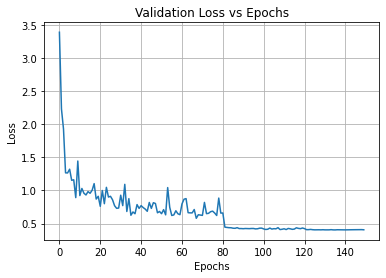

In [ ]:
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.title('Validation Loss vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

#### 3. Next use cutout for data augmentation in Resnet-44 as in Hoffer et al. and train the model and use the same set-up in your experiments. Plot validation error vs number of epochs for different values of M (2,4,8,16) where M is the number of instances generated from an input sample after applying cutout M times effectively increasing the batch size to M ·B, where B is the original batch size (before applying cutout augmentation). You will obtain a figure similar to Figure 3(a) in the paper by Hoffer et al. Also compare the number of epochs and wallclock time to reach 92% accuracy for different values of M. Do not run any experiment for more than 100 epochs. If even after 100 epochs of training you did not achieve 92% then just report the accuracy you obtain and the corresponding wallclock time to train for 100 epochs. Remember to use the same hyperparameters for training as used with Resnet44 training in He et al (look at the third paragraph in Sec. 4.2 of He et al for the hyperparameter values). Before attempting this question it is advisable to read the paper by Hoffer et al. and especially Section 4.1. (5+5)

In [ ]:
model = resnet(input_shape=x_train.shape[1:], depth= 65)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
cb = TimingCallback()

Learning rate:  0.001


In [ ]:
repeats = [2,4,8,16]
val_losses=[]
val_accuracy=[]
times=[]
for m in repeats:
  print("M:",m)
  x_train_aug=np.array(list(map(lambda x: cutout(x),np.repeat(x_train, repeats=m, axis=0))))
  y_train_aug=np.repeat(y_train, repeats=m, axis=0)

  datagen.fit(x_train_aug)

  history_aug=model.fit_generator(datagen.flow(x_train_aug, y_train_aug, batch_size=64),
                          validation_data=(x_test, y_test),
                          epochs=100, verbose=1,
                          callbacks=[callbacks,es,cb])
  val_losses=val_losses+[history_aug.history['val_loss']]
  val_accuracy=val_accuracy+[history_aug.history['val_accuracy']]
  times=times+[sum(cb.logs)]
  pd.DataFrame(val_losses).to_csv(f'/content/gdrive/My Drive/val_losses_q4.csv', index=False)
  pd.DataFrame(times).to_csv(f'/content/gdrive/My Drive/times_q4.csv', index=False)
  pd.DataFrame(val_accuracy).to_csv(f'/content/gdrive/My Drive/val_accuracy_q4.csv', index=False)
  
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

M: 2
Learning rate:  0.001
Epoch 1/100
   1/1563 [..............................] - ETA: 1:57 - loss: 1.0155 - accuracy: 0.7500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


1562/1563 [============================>.] - ETA: 0s - loss: 0.9013 - accuracy: 0.7934

1563/1563 [==============================] - 61s 39ms/step - loss: 0.9012 - accuracy: 0.7934 - val_loss: 1.2611 - val_accuracy: 0.7244 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.8515 - accuracy: 0.8064

1563/1563 [==============================] - 61s 39ms/step - loss: 0.8514 - accuracy: 0.8064 - val_loss: 1.1231 - val_accuracy: 0.7412 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
1563/1563 [==============================] - ETA: 0s - loss: 0.8114 - accuracy: 0.8167

1563/1563 [==============================] - 60s 39ms/step - loss: 0.8114 - accuracy: 0.8167 - val_loss: 0.8210 - val_accuracy: 0.8185 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7821 - accuracy: 0.8251

1563/1563 [==============================] - 61s 39ms/step - loss: 0.7821 - accuracy: 0.8251 - val_loss: 1.1832 - val_accuracy: 0.7327 - lr: 0.0010
Learning rate:  0.001
Epoch 5/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7516 - accuracy: 0.8336

1563/1563 [==============================] - 60s 39ms/step - loss: 0.7515 - accuracy: 0.8337 - val_loss: 1.1741 - val_accuracy: 0.7504 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.7288 - accuracy: 0.8403

1563/1563 [==============================] - 61s 39ms/step - loss: 0.7288 - accuracy: 0.8403 - val_loss: 0.8672 - val_accuracy: 0.8075 - lr: 0.0010
Learning rate:  0.001
Epoch 7/100
1563/1563 [==============================] - ETA: 0s - loss: 0.7085 - accuracy: 0.8453

1563/1563 [==============================] - 61s 39ms/step - loss: 0.7085 - accuracy: 0.8453 - val_loss: 0.9489 - val_accuracy: 0.7802 - lr: 0.0010
Learning rate:  0.001
Epoch 8/100
1563/1563 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.8493

1563/1563 [==============================] - 60s 39ms/step - loss: 0.6915 - accuracy: 0.8493 - val_loss: 0.8182 - val_accuracy: 0.8158 - lr: 0.0010
Learning rate:  0.001
Epoch 9/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.6741 - accuracy: 0.8541

1563/1563 [==============================] - 60s 39ms/step - loss: 0.6742 - accuracy: 0.8540 - val_loss: 0.8552 - val_accuracy: 0.8067 - lr: 0.0010
Learning rate:  0.001
Epoch 10/100
1563/1563 [==============================] - ETA: 0s - loss: 0.6605 - accuracy: 0.8580

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6605 - accuracy: 0.8580 - val_loss: 0.8196 - val_accuracy: 0.8253 - lr: 0.0010
Learning rate:  0.001
Epoch 11/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.6503 - accuracy: 0.8604

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6502 - accuracy: 0.8604 - val_loss: 0.7908 - val_accuracy: 0.8314 - lr: 0.0010
Learning rate:  0.001
Epoch 12/100
1563/1563 [==============================] - ETA: 0s - loss: 0.6358 - accuracy: 0.8651

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6358 - accuracy: 0.8651 - val_loss: 0.7164 - val_accuracy: 0.8530 - lr: 0.0010
Learning rate:  0.001
Epoch 13/100
1563/1563 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.8657

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6281 - accuracy: 0.8657 - val_loss: 0.7998 - val_accuracy: 0.8286 - lr: 0.0010
Learning rate:  0.001
Epoch 14/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.6146 - accuracy: 0.8701

1563/1563 [==============================] - 60s 39ms/step - loss: 0.6146 - accuracy: 0.8701 - val_loss: 0.7458 - val_accuracy: 0.8421 - lr: 0.0010
Learning rate:  0.001
Epoch 15/100
1563/1563 [==============================] - ETA: 0s - loss: 0.6070 - accuracy: 0.8730

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6070 - accuracy: 0.8730 - val_loss: 0.6856 - val_accuracy: 0.8516 - lr: 0.0010
Learning rate:  0.001
Epoch 16/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.6005 - accuracy: 0.8741

1563/1563 [==============================] - 61s 39ms/step - loss: 0.6004 - accuracy: 0.8741 - val_loss: 0.7269 - val_accuracy: 0.8453 - lr: 0.0010
Learning rate:  0.001
Epoch 17/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5925 - accuracy: 0.8760

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5925 - accuracy: 0.8760 - val_loss: 0.9521 - val_accuracy: 0.7946 - lr: 0.0010
Learning rate:  0.001
Epoch 18/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5850 - accuracy: 0.8784

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5850 - accuracy: 0.8784 - val_loss: 0.6885 - val_accuracy: 0.8586 - lr: 0.0010
Learning rate:  0.001
Epoch 19/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.8814

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5759 - accuracy: 0.8814 - val_loss: 0.7169 - val_accuracy: 0.8393 - lr: 0.0010
Learning rate:  0.001
Epoch 20/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.8837

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5678 - accuracy: 0.8837 - val_loss: 0.7571 - val_accuracy: 0.8398 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 21/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.8844

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5653 - accuracy: 0.8844 - val_loss: 1.0299 - val_accuracy: 0.7865 - lr: 0.0010
Learning rate:  0.001
Epoch 22/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5588 - accuracy: 0.8855

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5587 - accuracy: 0.8856 - val_loss: 0.7409 - val_accuracy: 0.8424 - lr: 0.0010
Learning rate:  0.001
Epoch 23/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5544 - accuracy: 0.8853

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5544 - accuracy: 0.8853 - val_loss: 1.1002 - val_accuracy: 0.7606 - lr: 0.0010
Learning rate:  0.001
Epoch 24/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.8883

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5485 - accuracy: 0.8883 - val_loss: 0.6398 - val_accuracy: 0.8717 - lr: 0.0010
Learning rate:  0.001
Epoch 25/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.8880

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5460 - accuracy: 0.8881 - val_loss: 0.7255 - val_accuracy: 0.8474 - lr: 0.0010
Learning rate:  0.001
Epoch 26/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5405 - accuracy: 0.8909

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5405 - accuracy: 0.8909 - val_loss: 0.7708 - val_accuracy: 0.8403 - lr: 0.0010
Learning rate:  0.001
Epoch 27/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5341 - accuracy: 0.8913

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5341 - accuracy: 0.8913 - val_loss: 0.6891 - val_accuracy: 0.8505 - lr: 0.0010
Learning rate:  0.001
Epoch 28/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5352 - accuracy: 0.8914

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5352 - accuracy: 0.8914 - val_loss: 0.6332 - val_accuracy: 0.8655 - lr: 0.0010
Learning rate:  0.001
Epoch 29/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.8952

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5248 - accuracy: 0.8952 - val_loss: 0.6763 - val_accuracy: 0.8634 - lr: 0.0010
Learning rate:  0.001
Epoch 30/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5259 - accuracy: 0.8931

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5259 - accuracy: 0.8931 - val_loss: 0.7500 - val_accuracy: 0.8470 - lr: 0.0010
Learning rate:  0.001
Epoch 31/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5223 - accuracy: 0.8941

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5223 - accuracy: 0.8941 - val_loss: 0.6529 - val_accuracy: 0.8717 - lr: 0.0010
Learning rate:  0.001
Epoch 32/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.8962

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5175 - accuracy: 0.8962 - val_loss: 0.8905 - val_accuracy: 0.8063 - lr: 0.0010
Learning rate:  0.001
Epoch 33/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5167 - accuracy: 0.8954

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5167 - accuracy: 0.8954 - val_loss: 0.6752 - val_accuracy: 0.8587 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 34/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.8973

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5108 - accuracy: 0.8973 - val_loss: 0.5890 - val_accuracy: 0.8813 - lr: 0.0010
Learning rate:  0.001
Epoch 35/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5094 - accuracy: 0.8976

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5094 - accuracy: 0.8976 - val_loss: 0.6492 - val_accuracy: 0.8658 - lr: 0.0010
Learning rate:  0.001
Epoch 36/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.9000

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5056 - accuracy: 0.9000 - val_loss: 0.7063 - val_accuracy: 0.8551 - lr: 0.0010
Learning rate:  0.001
Epoch 37/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5045 - accuracy: 0.8989

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5045 - accuracy: 0.8989 - val_loss: 0.5546 - val_accuracy: 0.8943 - lr: 0.0010
Learning rate:  0.001
Epoch 38/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5029 - accuracy: 0.9010

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5029 - accuracy: 0.9010 - val_loss: 0.6582 - val_accuracy: 0.8604 - lr: 0.0010
Learning rate:  0.001
Epoch 39/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.5002 - accuracy: 0.9011

1563/1563 [==============================] - 61s 39ms/step - loss: 0.5002 - accuracy: 0.9011 - val_loss: 0.8541 - val_accuracy: 0.8258 - lr: 0.0010
Learning rate:  0.001
Epoch 40/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4981 - accuracy: 0.9013

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4981 - accuracy: 0.9013 - val_loss: 0.6792 - val_accuracy: 0.8586 - lr: 0.0010
Learning rate:  0.001
Epoch 41/100
1563/1563 [==============================] - ETA: 0s - loss: 0.5001 - accuracy: 0.8997

1563/1563 [==============================] - 60s 39ms/step - loss: 0.5001 - accuracy: 0.8997 - val_loss: 0.7299 - val_accuracy: 0.8476 - lr: 0.0010
Learning rate:  0.001
Epoch 42/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4936 - accuracy: 0.9022

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4936 - accuracy: 0.9022 - val_loss: 0.8085 - val_accuracy: 0.8306 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 43/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4894 - accuracy: 0.9043

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4895 - accuracy: 0.9043 - val_loss: 0.7197 - val_accuracy: 0.8522 - lr: 0.0010
Learning rate:  0.001
Epoch 44/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4893 - accuracy: 0.9031

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4893 - accuracy: 0.9031 - val_loss: 0.6534 - val_accuracy: 0.8650 - lr: 0.0010
Learning rate:  0.001
Epoch 45/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4859 - accuracy: 0.9050

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4859 - accuracy: 0.9050 - val_loss: 0.8518 - val_accuracy: 0.8198 - lr: 0.0010
Learning rate:  0.001
Epoch 46/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.9057

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4853 - accuracy: 0.9057 - val_loss: 0.6419 - val_accuracy: 0.8713 - lr: 0.0010
Learning rate:  0.001
Epoch 47/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.9045

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4842 - accuracy: 0.9045 - val_loss: 0.5931 - val_accuracy: 0.8816 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 48/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4803 - accuracy: 0.9058

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4803 - accuracy: 0.9058 - val_loss: 0.7039 - val_accuracy: 0.8527 - lr: 0.0010
Learning rate:  0.001
Epoch 49/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4804 - accuracy: 0.9065

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4804 - accuracy: 0.9065 - val_loss: 0.6507 - val_accuracy: 0.8648 - lr: 0.0010
Learning rate:  0.001
Epoch 50/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.9061

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4779 - accuracy: 0.9061 - val_loss: 0.6565 - val_accuracy: 0.8642 - lr: 0.0010
Learning rate:  0.001
Epoch 51/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4777 - accuracy: 0.9060

1563/1563 [==============================] - 61s 39ms/step - loss: 0.4780 - accuracy: 0.9059 - val_loss: 0.5659 - val_accuracy: 0.8838 - lr: 0.0010
Learning rate:  0.001
Epoch 52/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4720 - accuracy: 0.9078

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4720 - accuracy: 0.9078 - val_loss: 0.6928 - val_accuracy: 0.8586 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 53/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.9067

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4734 - accuracy: 0.9067 - val_loss: 0.5678 - val_accuracy: 0.8893 - lr: 0.0010
Learning rate:  0.001
Epoch 54/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.9085

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4705 - accuracy: 0.9085 - val_loss: 0.6767 - val_accuracy: 0.8554 - lr: 0.0010
Learning rate:  0.001
Epoch 55/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4723 - accuracy: 0.9073

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4723 - accuracy: 0.9073 - val_loss: 0.5528 - val_accuracy: 0.8917 - lr: 0.0010
Learning rate:  0.001
Epoch 56/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4674 - accuracy: 0.9090

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4674 - accuracy: 0.9090 - val_loss: 0.5434 - val_accuracy: 0.8942 - lr: 0.0010
Learning rate:  0.001
Epoch 57/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.9096

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4676 - accuracy: 0.9096 - val_loss: 0.7406 - val_accuracy: 0.8505 - lr: 0.0010
Learning rate:  0.001
Epoch 58/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.9092

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4667 - accuracy: 0.9092 - val_loss: 0.6547 - val_accuracy: 0.8714 - lr: 0.0010
Learning rate:  0.001
Epoch 59/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.9099

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4632 - accuracy: 0.9099 - val_loss: 0.6372 - val_accuracy: 0.8683 - lr: 0.0010
Learning rate:  0.001
Epoch 60/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4623 - accuracy: 0.9097

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4622 - accuracy: 0.9097 - val_loss: 0.7119 - val_accuracy: 0.8592 - lr: 0.0010
Learning rate:  0.001
Epoch 61/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4632 - accuracy: 0.9084

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4632 - accuracy: 0.9084 - val_loss: 0.8133 - val_accuracy: 0.8304 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 62/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4573 - accuracy: 0.9127

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4573 - accuracy: 0.9127 - val_loss: 0.6987 - val_accuracy: 0.8605 - lr: 0.0010
Learning rate:  0.001
Epoch 63/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4591 - accuracy: 0.9114

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4591 - accuracy: 0.9114 - val_loss: 0.6005 - val_accuracy: 0.8836 - lr: 0.0010
Learning rate:  0.001
Epoch 64/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.9116

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4559 - accuracy: 0.9116 - val_loss: 0.6840 - val_accuracy: 0.8638 - lr: 0.0010
Learning rate:  0.001
Epoch 65/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4564 - accuracy: 0.9122

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4564 - accuracy: 0.9122 - val_loss: 0.5484 - val_accuracy: 0.8946 - lr: 0.0010
Learning rate:  0.001
Epoch 66/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4560 - accuracy: 0.9108

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4559 - accuracy: 0.9108 - val_loss: 0.6793 - val_accuracy: 0.8565 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 67/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4543 - accuracy: 0.9119

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4543 - accuracy: 0.9119 - val_loss: 0.8420 - val_accuracy: 0.8285 - lr: 0.0010
Learning rate:  0.001
Epoch 68/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4551 - accuracy: 0.9113

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4551 - accuracy: 0.9113 - val_loss: 0.6878 - val_accuracy: 0.8554 - lr: 0.0010
Learning rate:  0.001
Epoch 69/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4498 - accuracy: 0.9125

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4498 - accuracy: 0.9125 - val_loss: 0.7283 - val_accuracy: 0.8561 - lr: 0.0010
Learning rate:  0.001
Epoch 70/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.9118

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4531 - accuracy: 0.9118 - val_loss: 0.6109 - val_accuracy: 0.8804 - lr: 0.0010
Learning rate:  0.001
Epoch 71/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4484 - accuracy: 0.9140

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4484 - accuracy: 0.9140 - val_loss: 0.6430 - val_accuracy: 0.8648 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 72/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.9143

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4463 - accuracy: 0.9143 - val_loss: 0.6709 - val_accuracy: 0.8705 - lr: 0.0010
Learning rate:  0.001
Epoch 73/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.9128

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4488 - accuracy: 0.9128 - val_loss: 0.5561 - val_accuracy: 0.8904 - lr: 0.0010
Learning rate:  0.001
Epoch 74/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4442 - accuracy: 0.9148

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4442 - accuracy: 0.9148 - val_loss: 0.6503 - val_accuracy: 0.8643 - lr: 0.0010
Learning rate:  0.001
Epoch 75/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4455 - accuracy: 0.9154

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4456 - accuracy: 0.9154 - val_loss: 0.6328 - val_accuracy: 0.8679 - lr: 0.0010
Learning rate:  0.001
Epoch 76/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4425 - accuracy: 0.9151

1563/1563 [==============================] - 59s 38ms/step - loss: 0.4425 - accuracy: 0.9151 - val_loss: 0.6570 - val_accuracy: 0.8664 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 77/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.9138

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4444 - accuracy: 0.9138 - val_loss: 0.5794 - val_accuracy: 0.8866 - lr: 0.0010
Learning rate:  0.001
Epoch 78/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4409 - accuracy: 0.9146

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4409 - accuracy: 0.9146 - val_loss: 0.5953 - val_accuracy: 0.8785 - lr: 0.0010
Learning rate:  0.001
Epoch 79/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4412 - accuracy: 0.9149

1563/1563 [==============================] - 60s 39ms/step - loss: 0.4412 - accuracy: 0.9150 - val_loss: 0.6635 - val_accuracy: 0.8584 - lr: 0.0010
Learning rate:  0.001
Epoch 80/100
1563/1563 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.9159

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4401 - accuracy: 0.9159 - val_loss: 0.6113 - val_accuracy: 0.8794 - lr: 0.0010
Learning rate:  0.001
Epoch 81/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.4385 - accuracy: 0.9162

1563/1563 [==============================] - 60s 38ms/step - loss: 0.4385 - accuracy: 0.9162 - val_loss: 0.8311 - val_accuracy: 0.8250 - lr: 3.1623e-04
Learning rate:  0.0001
Epoch 82/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.3565 - accuracy: 0.9456

1563/1563 [==============================] - 61s 39ms/step - loss: 0.3565 - accuracy: 0.9456 - val_loss: 0.4386 - val_accuracy: 0.9235 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 83/100
1563/1563 [==============================] - ETA: 0s - loss: 0.3227 - accuracy: 0.9556

1563/1563 [==============================] - 60s 38ms/step - loss: 0.3227 - accuracy: 0.9556 - val_loss: 0.4258 - val_accuracy: 0.9282 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 84/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.9589

1563/1563 [==============================] - 60s 38ms/step - loss: 0.3097 - accuracy: 0.9589 - val_loss: 0.4343 - val_accuracy: 0.9251 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 85/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.9624

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2949 - accuracy: 0.9624 - val_loss: 0.4237 - val_accuracy: 0.9298 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 86/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2852 - accuracy: 0.9640

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2852 - accuracy: 0.9640 - val_loss: 0.4185 - val_accuracy: 0.9290 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 87/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2758 - accuracy: 0.9671

1563/1563 [==============================] - 60s 39ms/step - loss: 0.2758 - accuracy: 0.9671 - val_loss: 0.4255 - val_accuracy: 0.9314 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 88/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2670 - accuracy: 0.9679

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2670 - accuracy: 0.9679 - val_loss: 0.4266 - val_accuracy: 0.9280 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 89/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.9687

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2620 - accuracy: 0.9687 - val_loss: 0.4270 - val_accuracy: 0.9279 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 90/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2568 - accuracy: 0.9697

1563/1563 [==============================] - 61s 39ms/step - loss: 0.2568 - accuracy: 0.9697 - val_loss: 0.4206 - val_accuracy: 0.9286 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 91/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.9714

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2501 - accuracy: 0.9714 - val_loss: 0.4239 - val_accuracy: 0.9306 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 92/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2432 - accuracy: 0.9726

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2432 - accuracy: 0.9726 - val_loss: 0.4282 - val_accuracy: 0.9274 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 93/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9728

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2391 - accuracy: 0.9728 - val_loss: 0.4262 - val_accuracy: 0.9280 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 94/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2351 - accuracy: 0.9737

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2351 - accuracy: 0.9737 - val_loss: 0.4295 - val_accuracy: 0.9316 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 95/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9738

1563/1563 [==============================] - 60s 39ms/step - loss: 0.2303 - accuracy: 0.9738 - val_loss: 0.4228 - val_accuracy: 0.9288 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 96/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9755

1563/1563 [==============================] - 60s 38ms/step - loss: 0.2254 - accuracy: 0.9755 - val_loss: 0.4226 - val_accuracy: 0.9296 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 97/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9757

1563/1563 [==============================] - 61s 39ms/step - loss: 0.2230 - accuracy: 0.9757 - val_loss: 0.4297 - val_accuracy: 0.9301 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 98/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9760

1563/1563 [==============================] - 61s 39ms/step - loss: 0.2191 - accuracy: 0.9760 - val_loss: 0.4273 - val_accuracy: 0.9269 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 99/100
1563/1563 [==============================] - ETA: 0s - loss: 0.2141 - accuracy: 0.9772

1563/1563 [==============================] - 60s 39ms/step - loss: 0.2141 - accuracy: 0.9772 - val_loss: 0.4263 - val_accuracy: 0.9309 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 100/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2105 - accuracy: 0.9780

313/313 [==============================] - 4s 11ms/step - loss: 0.4289 - accuracy: 0.9300
Test loss: 0.42890819907188416
Test accuracy: 0.9300000071525574
M: 4
Learning rate:  0.001
Epoch 1/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4427 - accuracy: 0.9039

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4427 - accuracy: 0.9039 - val_loss: 0.6704 - val_accuracy: 0.8579 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.9098

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4360 - accuracy: 0.9098 - val_loss: 0.6736 - val_accuracy: 0.8590 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4419 - accuracy: 0.9108

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4419 - accuracy: 0.9108 - val_loss: 0.6240 - val_accuracy: 0.8726 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4410 - accuracy: 0.9119

3125/3125 [==============================] - 117s 38ms/step - loss: 0.4410 - accuracy: 0.9119 - val_loss: 0.6529 - val_accuracy: 0.8671 - lr: 0.0010
Learning rate:  0.001
Epoch 5/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4402 - accuracy: 0.9124

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4402 - accuracy: 0.9124 - val_loss: 0.5812 - val_accuracy: 0.8804 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4409 - accuracy: 0.9128

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4409 - accuracy: 0.9128 - val_loss: 0.6663 - val_accuracy: 0.8670 - lr: 0.0010
Learning rate:  0.001
Epoch 7/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4402 - accuracy: 0.9129

3125/3125 [==============================] - 117s 38ms/step - loss: 0.4402 - accuracy: 0.9129 - val_loss: 0.6143 - val_accuracy: 0.8737 - lr: 0.0010
Learning rate:  0.001
Epoch 8/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4376 - accuracy: 0.9136

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4376 - accuracy: 0.9136 - val_loss: 0.5659 - val_accuracy: 0.8884 - lr: 0.0010
Learning rate:  0.001
Epoch 9/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.9148

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4367 - accuracy: 0.9148 - val_loss: 0.6876 - val_accuracy: 0.8601 - lr: 0.0010
Learning rate:  0.001
Epoch 10/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4335 - accuracy: 0.9153

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4335 - accuracy: 0.9153 - val_loss: 0.6899 - val_accuracy: 0.8573 - lr: 0.0010
Learning rate:  0.001
Epoch 11/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4327 - accuracy: 0.9159

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4327 - accuracy: 0.9159 - val_loss: 0.5780 - val_accuracy: 0.8871 - lr: 0.0010
Learning rate:  0.001
Epoch 12/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.9162

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4307 - accuracy: 0.9162 - val_loss: 0.5523 - val_accuracy: 0.8913 - lr: 0.0010
Learning rate:  0.001
Epoch 13/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4312 - accuracy: 0.9155

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4312 - accuracy: 0.9154 - val_loss: 0.6881 - val_accuracy: 0.8583 - lr: 0.0010
Learning rate:  0.001
Epoch 14/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.9169

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4285 - accuracy: 0.9168 - val_loss: 0.6627 - val_accuracy: 0.8643 - lr: 0.0010
Learning rate:  0.001
Epoch 15/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.9177

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4264 - accuracy: 0.9177 - val_loss: 0.6233 - val_accuracy: 0.8688 - lr: 0.0010
Learning rate:  0.001
Epoch 16/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4256 - accuracy: 0.9178

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4256 - accuracy: 0.9178 - val_loss: 0.5960 - val_accuracy: 0.8768 - lr: 0.0010
Learning rate:  0.001
Epoch 17/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.9175

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4259 - accuracy: 0.9175 - val_loss: 0.5150 - val_accuracy: 0.8959 - lr: 0.0010
Learning rate:  0.001
Epoch 18/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4217 - accuracy: 0.9192

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4217 - accuracy: 0.9192 - val_loss: 0.5608 - val_accuracy: 0.8844 - lr: 0.0010
Learning rate:  0.001
Epoch 19/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.9184

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4207 - accuracy: 0.9184 - val_loss: 0.7835 - val_accuracy: 0.8395 - lr: 0.0010
Learning rate:  0.001
Epoch 20/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4205 - accuracy: 0.9178

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4205 - accuracy: 0.9178 - val_loss: 0.6976 - val_accuracy: 0.8562 - lr: 0.0010
Learning rate:  0.001
Epoch 21/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4184 - accuracy: 0.9191

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4184 - accuracy: 0.9191 - val_loss: 0.6566 - val_accuracy: 0.8684 - lr: 0.0010
Learning rate:  0.001
Epoch 22/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4192 - accuracy: 0.9185

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4192 - accuracy: 0.9185 - val_loss: 0.6285 - val_accuracy: 0.8758 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 23/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4170 - accuracy: 0.9198

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4170 - accuracy: 0.9198 - val_loss: 0.5515 - val_accuracy: 0.8889 - lr: 0.0010
Learning rate:  0.001
Epoch 24/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4146 - accuracy: 0.9206

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4146 - accuracy: 0.9207 - val_loss: 0.6095 - val_accuracy: 0.8742 - lr: 0.0010
Learning rate:  0.001
Epoch 25/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4143 - accuracy: 0.9196

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4143 - accuracy: 0.9196 - val_loss: 0.7030 - val_accuracy: 0.8533 - lr: 0.0010
Learning rate:  0.001
Epoch 26/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4138 - accuracy: 0.9204

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4138 - accuracy: 0.9204 - val_loss: 0.7574 - val_accuracy: 0.8441 - lr: 0.0010
Learning rate:  0.001
Epoch 27/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4141 - accuracy: 0.9199

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4141 - accuracy: 0.9199 - val_loss: 0.6152 - val_accuracy: 0.8775 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 28/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4117 - accuracy: 0.9209

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4117 - accuracy: 0.9209 - val_loss: 0.5596 - val_accuracy: 0.8913 - lr: 0.0010
Learning rate:  0.001
Epoch 29/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4107 - accuracy: 0.9213

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4107 - accuracy: 0.9213 - val_loss: 0.5218 - val_accuracy: 0.8955 - lr: 0.0010
Learning rate:  0.001
Epoch 30/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4077 - accuracy: 0.9208

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4077 - accuracy: 0.9208 - val_loss: 0.6337 - val_accuracy: 0.8754 - lr: 0.0010
Learning rate:  0.001
Epoch 31/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4094 - accuracy: 0.9209

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4095 - accuracy: 0.9209 - val_loss: 0.6167 - val_accuracy: 0.8746 - lr: 0.0010
Learning rate:  0.001
Epoch 32/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4074 - accuracy: 0.9219

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4074 - accuracy: 0.9219 - val_loss: 0.5529 - val_accuracy: 0.8884 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 33/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.9220

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4075 - accuracy: 0.9220 - val_loss: 0.5892 - val_accuracy: 0.8851 - lr: 0.0010
Learning rate:  0.001
Epoch 34/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4051 - accuracy: 0.9223

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4051 - accuracy: 0.9223 - val_loss: 0.6655 - val_accuracy: 0.8639 - lr: 0.0010
Learning rate:  0.001
Epoch 35/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4067 - accuracy: 0.9209

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4067 - accuracy: 0.9209 - val_loss: 0.5980 - val_accuracy: 0.8835 - lr: 0.0010
Learning rate:  0.001
Epoch 36/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4055 - accuracy: 0.9221

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4056 - accuracy: 0.9221 - val_loss: 0.5758 - val_accuracy: 0.8856 - lr: 0.0010
Learning rate:  0.001
Epoch 37/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.4051 - accuracy: 0.9221

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4051 - accuracy: 0.9220 - val_loss: 0.6106 - val_accuracy: 0.8750 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 38/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4026 - accuracy: 0.9226

3125/3125 [==============================] - 115s 37ms/step - loss: 0.4026 - accuracy: 0.9226 - val_loss: 0.5675 - val_accuracy: 0.8858 - lr: 0.0010
Learning rate:  0.001
Epoch 39/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.9226

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4020 - accuracy: 0.9226 - val_loss: 0.6375 - val_accuracy: 0.8802 - lr: 0.0010
Learning rate:  0.001
Epoch 40/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4005 - accuracy: 0.9240

3125/3125 [==============================] - 117s 37ms/step - loss: 0.4005 - accuracy: 0.9240 - val_loss: 0.5787 - val_accuracy: 0.8886 - lr: 0.0010
Learning rate:  0.001
Epoch 41/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4028 - accuracy: 0.9226

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4028 - accuracy: 0.9226 - val_loss: 0.6557 - val_accuracy: 0.8732 - lr: 0.0010
Learning rate:  0.001
Epoch 42/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4002 - accuracy: 0.9235

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4002 - accuracy: 0.9235 - val_loss: 0.5449 - val_accuracy: 0.8905 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 43/100
3125/3125 [==============================] - ETA: 0s - loss: 0.4005 - accuracy: 0.9230

3125/3125 [==============================] - 116s 37ms/step - loss: 0.4005 - accuracy: 0.9230 - val_loss: 0.7267 - val_accuracy: 0.8423 - lr: 0.0010
Learning rate:  0.001
Epoch 44/100
3125/3125 [==============================] - ETA: 0s - loss: 0.3982 - accuracy: 0.9241

3125/3125 [==============================] - 115s 37ms/step - loss: 0.3982 - accuracy: 0.9241 - val_loss: 0.5248 - val_accuracy: 0.8923 - lr: 0.0010
Learning rate:  0.001
Epoch 45/100
3125/3125 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.9233

3125/3125 [==============================] - 116s 37ms/step - loss: 0.3989 - accuracy: 0.9233 - val_loss: 0.6533 - val_accuracy: 0.8689 - lr: 0.0010
Learning rate:  0.001
Epoch 46/100
3125/3125 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.9240

3125/3125 [==============================] - 118s 38ms/step - loss: 0.3978 - accuracy: 0.9240 - val_loss: 0.5355 - val_accuracy: 0.8942 - lr: 0.0010
Learning rate:  0.001
Epoch 47/100
3124/3125 [============================>.] - ETA: 0s - loss: 0.3968 - accuracy: 0.9246

3125/3125 [==============================] - 116s 37ms/step - loss: 0.3969 - accuracy: 0.9246 - val_loss: 0.6034 - val_accuracy: 0.8789 - lr: 3.1623e-04
Epoch 47: early stopping
313/313 [==============================] - 4s 11ms/step - loss: 0.6034 - accuracy: 0.8789
Test loss: 0.6033809781074524
Test accuracy: 0.8788999915122986
M: 8
Learning rate:  0.001
Epoch 1/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.9198

6250/6250 [==============================] - 230s 37ms/step - loss: 0.4080 - accuracy: 0.9198 - val_loss: 0.7396 - val_accuracy: 0.8447 - lr: 0.0010
Learning rate:  0.001
Epoch 2/100
6250/6250 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.9207

6250/6250 [==============================] - 230s 37ms/step - loss: 0.4044 - accuracy: 0.9207 - val_loss: 0.5988 - val_accuracy: 0.8743 - lr: 0.0010
Learning rate:  0.001
Epoch 3/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.4021 - accuracy: 0.9216

6250/6250 [==============================] - 231s 37ms/step - loss: 0.4021 - accuracy: 0.9216 - val_loss: 0.5800 - val_accuracy: 0.8873 - lr: 0.0010
Learning rate:  0.001
Epoch 4/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3996 - accuracy: 0.9222

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3996 - accuracy: 0.9222 - val_loss: 0.5938 - val_accuracy: 0.8823 - lr: 0.0010
Learning rate:  0.001
Epoch 5/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3983 - accuracy: 0.9220

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3983 - accuracy: 0.9220 - val_loss: 0.6132 - val_accuracy: 0.8790 - lr: 0.0010
Learning rate:  0.001
Epoch 6/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3968 - accuracy: 0.9228

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3968 - accuracy: 0.9228 - val_loss: 0.5712 - val_accuracy: 0.8811 - lr: 0.0010
Learning rate:  0.001
Epoch 7/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.9235

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3933 - accuracy: 0.9235 - val_loss: 0.6193 - val_accuracy: 0.8661 - lr: 0.0010
Learning rate:  0.001
Epoch 8/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3940 - accuracy: 0.9229

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3940 - accuracy: 0.9229 - val_loss: 0.5159 - val_accuracy: 0.8969 - lr: 0.0010
Learning rate:  0.001
Epoch 9/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3936 - accuracy: 0.9233

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3936 - accuracy: 0.9233 - val_loss: 0.5585 - val_accuracy: 0.8829 - lr: 0.0010
Learning rate:  0.001
Epoch 10/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.9235

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3915 - accuracy: 0.9235 - val_loss: 0.6422 - val_accuracy: 0.8701 - lr: 0.0010
Learning rate:  0.001
Epoch 11/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.9245

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3905 - accuracy: 0.9245 - val_loss: 0.5146 - val_accuracy: 0.9003 - lr: 0.0010
Learning rate:  0.001
Epoch 12/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.9250

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3887 - accuracy: 0.9250 - val_loss: 0.5450 - val_accuracy: 0.8912 - lr: 0.0010
Learning rate:  0.001
Epoch 13/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3894 - accuracy: 0.9243

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3894 - accuracy: 0.9243 - val_loss: 0.5548 - val_accuracy: 0.8872 - lr: 0.0010
Learning rate:  0.001
Epoch 14/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3885 - accuracy: 0.9247

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3884 - accuracy: 0.9247 - val_loss: 0.5667 - val_accuracy: 0.8898 - lr: 0.0010
Learning rate:  0.001
Epoch 15/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3882 - accuracy: 0.9250

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3881 - accuracy: 0.9250 - val_loss: 0.5537 - val_accuracy: 0.8859 - lr: 0.0010
Learning rate:  0.001
Epoch 16/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3867 - accuracy: 0.9250

6250/6250 [==============================] - 235s 38ms/step - loss: 0.3867 - accuracy: 0.9250 - val_loss: 0.5753 - val_accuracy: 0.8757 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 17/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.9253

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3849 - accuracy: 0.9253 - val_loss: 0.4880 - val_accuracy: 0.8987 - lr: 0.0010
Learning rate:  0.001
Epoch 18/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3840 - accuracy: 0.9260

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3840 - accuracy: 0.9260 - val_loss: 0.5722 - val_accuracy: 0.8831 - lr: 0.0010
Learning rate:  0.001
Epoch 19/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.9261

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3833 - accuracy: 0.9261 - val_loss: 0.5049 - val_accuracy: 0.8952 - lr: 0.0010
Learning rate:  0.001
Epoch 20/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.9262

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3823 - accuracy: 0.9262 - val_loss: 0.5577 - val_accuracy: 0.8926 - lr: 0.0010
Learning rate:  0.001
Epoch 21/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.9265

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3827 - accuracy: 0.9265 - val_loss: 0.4927 - val_accuracy: 0.8997 - lr: 0.0010
Learning rate:  0.001
Epoch 22/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3806 - accuracy: 0.9264

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3806 - accuracy: 0.9264 - val_loss: 0.5198 - val_accuracy: 0.8963 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 23/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3807 - accuracy: 0.9265

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3807 - accuracy: 0.9265 - val_loss: 0.5847 - val_accuracy: 0.8824 - lr: 0.0010
Learning rate:  0.001
Epoch 24/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.9269

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3790 - accuracy: 0.9269 - val_loss: 0.4820 - val_accuracy: 0.9068 - lr: 0.0010
Learning rate:  0.001
Epoch 25/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3794 - accuracy: 0.9269

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3794 - accuracy: 0.9269 - val_loss: 0.5133 - val_accuracy: 0.8990 - lr: 0.0010
Learning rate:  0.001
Epoch 26/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.9274

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3774 - accuracy: 0.9274 - val_loss: 0.5438 - val_accuracy: 0.8894 - lr: 0.0010
Learning rate:  0.001
Epoch 27/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.9271

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3772 - accuracy: 0.9271 - val_loss: 0.6544 - val_accuracy: 0.8721 - lr: 0.0010
Learning rate:  0.001
Epoch 28/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.9271

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3778 - accuracy: 0.9271 - val_loss: 0.5760 - val_accuracy: 0.8799 - lr: 0.0010
Learning rate:  0.001
Epoch 29/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3770 - accuracy: 0.9273

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3770 - accuracy: 0.9273 - val_loss: 0.6914 - val_accuracy: 0.8615 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 30/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.9278

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3747 - accuracy: 0.9278 - val_loss: 0.5950 - val_accuracy: 0.8792 - lr: 0.0010
Learning rate:  0.001
Epoch 31/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.9273

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3756 - accuracy: 0.9273 - val_loss: 0.4636 - val_accuracy: 0.9082 - lr: 0.0010
Learning rate:  0.001
Epoch 32/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3736 - accuracy: 0.9279

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3736 - accuracy: 0.9279 - val_loss: 0.5139 - val_accuracy: 0.8968 - lr: 0.0010
Learning rate:  0.001
Epoch 33/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3743 - accuracy: 0.9274

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3743 - accuracy: 0.9274 - val_loss: 0.4893 - val_accuracy: 0.9008 - lr: 0.0010
Learning rate:  0.001
Epoch 34/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3721 - accuracy: 0.9285

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3721 - accuracy: 0.9285 - val_loss: 0.5608 - val_accuracy: 0.8891 - lr: 0.0010
Learning rate:  0.001
Epoch 35/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3721 - accuracy: 0.9282

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3721 - accuracy: 0.9282 - val_loss: 0.5924 - val_accuracy: 0.8810 - lr: 0.0010
Learning rate:  0.001
Epoch 36/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3716 - accuracy: 0.9286

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3716 - accuracy: 0.9286 - val_loss: 0.6646 - val_accuracy: 0.8664 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 37/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3709 - accuracy: 0.9290

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3709 - accuracy: 0.9290 - val_loss: 0.6906 - val_accuracy: 0.8561 - lr: 0.0010
Learning rate:  0.001
Epoch 38/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3701 - accuracy: 0.9289

6250/6250 [==============================] - 229s 37ms/step - loss: 0.3701 - accuracy: 0.9289 - val_loss: 0.6438 - val_accuracy: 0.8717 - lr: 0.0010
Learning rate:  0.001
Epoch 39/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.9288

6250/6250 [==============================] - 230s 37ms/step - loss: 0.3696 - accuracy: 0.9288 - val_loss: 0.5434 - val_accuracy: 0.8916 - lr: 0.0010
Learning rate:  0.001
Epoch 40/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3696 - accuracy: 0.9292

6250/6250 [==============================] - 230s 37ms/step - loss: 0.3696 - accuracy: 0.9292 - val_loss: 0.5469 - val_accuracy: 0.8914 - lr: 0.0010
Learning rate:  0.001
Epoch 41/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3705 - accuracy: 0.9290

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3705 - accuracy: 0.9290 - val_loss: 0.4965 - val_accuracy: 0.9025 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 42/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.9294

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3685 - accuracy: 0.9294 - val_loss: 0.5207 - val_accuracy: 0.9001 - lr: 0.0010
Learning rate:  0.001
Epoch 43/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.9298

6250/6250 [==============================] - 231s 37ms/step - loss: 0.3674 - accuracy: 0.9298 - val_loss: 0.5191 - val_accuracy: 0.8924 - lr: 0.0010
Learning rate:  0.001
Epoch 44/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.9294

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3679 - accuracy: 0.9294 - val_loss: 0.5138 - val_accuracy: 0.8992 - lr: 0.0010
Learning rate:  0.001
Epoch 45/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.9292

6250/6250 [==============================] - 235s 38ms/step - loss: 0.3681 - accuracy: 0.9292 - val_loss: 0.6035 - val_accuracy: 0.8743 - lr: 0.0010
Learning rate:  0.001
Epoch 46/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.9296

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3670 - accuracy: 0.9296 - val_loss: 0.6756 - val_accuracy: 0.8569 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 47/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3673 - accuracy: 0.9302

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3673 - accuracy: 0.9301 - val_loss: 0.5647 - val_accuracy: 0.8888 - lr: 0.0010
Learning rate:  0.001
Epoch 48/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.9302

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3649 - accuracy: 0.9302 - val_loss: 0.5841 - val_accuracy: 0.8796 - lr: 0.0010
Learning rate:  0.001
Epoch 49/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.9300

6250/6250 [==============================] - 235s 38ms/step - loss: 0.3654 - accuracy: 0.9300 - val_loss: 0.5963 - val_accuracy: 0.8826 - lr: 0.0010
Learning rate:  0.001
Epoch 50/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.9302

6250/6250 [==============================] - 236s 38ms/step - loss: 0.3649 - accuracy: 0.9302 - val_loss: 0.4905 - val_accuracy: 0.8975 - lr: 0.0010
Learning rate:  0.001
Epoch 51/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3646 - accuracy: 0.9303

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3646 - accuracy: 0.9303 - val_loss: 0.7024 - val_accuracy: 0.8556 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 52/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3640 - accuracy: 0.9305

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3640 - accuracy: 0.9305 - val_loss: 0.6272 - val_accuracy: 0.8748 - lr: 0.0010
Learning rate:  0.001
Epoch 53/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.9300

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3639 - accuracy: 0.9300 - val_loss: 0.4993 - val_accuracy: 0.8995 - lr: 0.0010
Learning rate:  0.001
Epoch 54/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3627 - accuracy: 0.9308

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3627 - accuracy: 0.9308 - val_loss: 0.6675 - val_accuracy: 0.8557 - lr: 0.0010
Learning rate:  0.001
Epoch 55/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.9308

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3626 - accuracy: 0.9308 - val_loss: 0.4733 - val_accuracy: 0.9097 - lr: 0.0010
Learning rate:  0.001
Epoch 56/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3620 - accuracy: 0.9306

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3620 - accuracy: 0.9306 - val_loss: 0.5336 - val_accuracy: 0.8927 - lr: 3.1623e-04
Learning rate:  0.001
Epoch 57/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.9305

6250/6250 [==============================] - 234s 37ms/step - loss: 0.3619 - accuracy: 0.9305 - val_loss: 0.5006 - val_accuracy: 0.8973 - lr: 0.0010
Learning rate:  0.001
Epoch 58/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3603 - accuracy: 0.9312

6250/6250 [==============================] - 232s 37ms/step - loss: 0.3603 - accuracy: 0.9312 - val_loss: 0.5378 - val_accuracy: 0.8908 - lr: 0.0010
Learning rate:  0.001
Epoch 59/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.9311

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3606 - accuracy: 0.9311 - val_loss: 0.5178 - val_accuracy: 0.8991 - lr: 0.0010
Learning rate:  0.001
Epoch 60/100
6249/6250 [============================>.] - ETA: 0s - loss: 0.3607 - accuracy: 0.9308

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3607 - accuracy: 0.9308 - val_loss: 0.5513 - val_accuracy: 0.8867 - lr: 0.0010
Learning rate:  0.001
Epoch 61/100
6250/6250 [==============================] - ETA: 0s - loss: 0.3614 - accuracy: 0.9305

6250/6250 [==============================] - 233s 37ms/step - loss: 0.3614 - accuracy: 0.9305 - val_loss: 0.5558 - val_accuracy: 0.8868 - lr: 3.1623e-04
Epoch 61: early stopping
313/313 [==============================] - 4s 12ms/step - loss: 0.5558 - accuracy: 0.8868
Test loss: 0.5558146238327026
Test accuracy: 0.8867999911308289
M: 16
Learning rate:  0.001
Epoch 1/100
 6202/12500 [=============>................] - ETA: 3:53 - loss: 0.3636 - accuracy: 0.9301

KeyboardInterrupt: ignored

Validation Loss vs Epochs

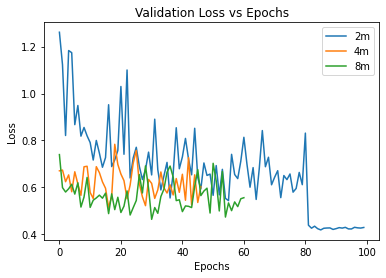

In [ ]:
fig = plt.figure()
plt.plot(range(0,100),val_losses[0],label="2m")
plt.plot(range(0,len(val_losses[1])),val_losses[1],label="4m")
plt.plot(range(0,len(val_losses[2])),val_losses[2],label="8m")
plt.title('Validation Loss vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

Validation Accuracy vs Epochs

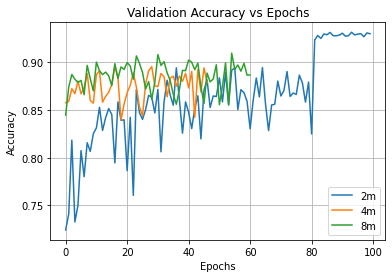

In [ ]:
fig = plt.figure()
plt.plot(range(0,100),val_accuracy[0],label="2m")
plt.plot(range(0,len(val_accuracy[1])),val_accuracy[1],label="4m")
plt.plot(range(0,len(val_accuracy[2])),val_accuracy[2],label="8m")
plt.title('Validation Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
for x in range(0,3):
  print("M = ",repeats[x],"- Wall time:",times[x])

M =  2 - Wall time: 6384.3645646649875
M =  4 - Wall time: 11844.100739455991
M =  8 - Wall time: 26028.959798091


       _